In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r'C:\Nimish\Capstone-phase1-data.xls')
df

State/UT     Region  Year  population(total)  Area (km2)  \
0         A& N ISLANDS    islands  2001             356650        8249   
1       ANDHRA PRADESH      south  2001           75728401      275045   
2    ARUNACHAL PRADESH  northeast  2001            1098328       83743   
3                ASSAM  northeast  2001           26638600       78438   
4                BIHAR       east  2001           82879911       94163   
..                 ...        ...   ...                ...         ...   
415         TAMIL NADU      south  2012           73141715      130058   
416            TRIPURA  northeast  2012            3718947       10486   
417      UTTAR PRADESH      north  2012          202934265      240928   
418        UTTARAKHAND      north  2012           10279517       53483   
419        WEST BENGAL       east  2012           92460379       88752   

     Literacy rate  total literate population  Attempt to murder  Murder  \
0            81.30                   253135.0                  0      13   
1            60.47                 39934323.0               1555    2602   
2            54.34                   484785.0                 53      83   
3            63.25                 14015354.0                481    1356   
4            47.00                 31109577.0               3419    3643   
..             ...                        ...                ...     ...   
415          80.88                 53274562.0               2954    1949   
416          80.89                  2897340.0                 79     124   
417          67.98                118889202.0               4811    4966   
418          79.22                  7100774.0                161     217   
419          76.88                 63274096.0               2854    2252   

     Rape  ...  Cruelty by husband or his relatives  \
0       3  ...                                    9   
1     871  ...                                 5791   
2      33  ...                                   11   
3     817  ...                                 1248   
4     888  ...                                 1558   
..    ...  ...                                  ...   
415   737  ...                                 1965   
416   229  ...                                  858   
417  1963  ...                                 7661   
418   148  ...                                  368   
419  2046  ...                                19865   

     Importation of girls from other countries  Other IPC crimes  \
0                                            0               323   
1                                            7             34344   
2                                            0               618   
3                                            0              9315   
4                                           83             36667   
..                                         ...               ...   
415                                          0            124176   
416                                          0              1742   
417                                          0             68538   
418                                          0              2118   
419                                         12             64482   

     Total IPC crimes  Total Crimes  tot_crimes_sc  total crime against women  \
0                 658          1386              0                       34.0   
1              130089        278982           2933                    13669.0   
2                2342          5243              0                      180.0   
3               36877         81418              6                     4048.0   
4               88432        189612           1303                     4489.0   
..                ...           ...            ...                        ...   
415            200474        415626           1647                     6381.0   
416              6264         13461             76                     1559.0   
417  

We will be using this dataframe for which we have extracted the data from various sites and informed in the last jupyter notebook. We have removed the district column as it is not required for our analysis.

In [3]:
north=['HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'PUNJAB', 'RAJASTHAN', 'UTTAR PRADESH', 'UTTARAKHAND', 'DELHI','CHANDIGARH']
central=['MADHYA PRADESH', 'CHATTISGARH']
west=['GOA', 'GUJARAT', 'MAHARASHTRA', 'D & N HAVELI', 'DAMAN & DIU']
south=['ANDHRA PRADESH', 'KARNATAKA','KERELA', 'TAMIL NADU','PUDUCHERRY']
northeast=['ARUNACHAL PRADESH', 'ASSAM', 'NAGALAND', 'SIKKIM', 'MIZORAM', 'MEGHALAYA', 'TRIPURA', 'MANIPUR']
east=['BIHAR', 'JHARKHAND', 'ODISHA', 'WEST BENGAL']
islands=['A& N ISLANDS', 'LAKSHADWEEP']

We have grouped the states into regions for easy comparison and to have insights about the regions as well for better understanding.

## Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   State/UT                                     420 non-null    object 
 1   Region                                       420 non-null    object 
 2   Year                                         420 non-null    int64  
 3   population(total)                            420 non-null    int64  
 4   Area (km2)                                   420 non-null    int64  
 5   Literacy rate                                420 non-null    float64
 6   total literate population                    420 non-null    float64
 7   Attempt to murder                            420 non-null    int64  
 8   Murder                                       420 non-null    int64  
 9   Rape                                         420 non-null    int64  
 10  Ki

As we can see there are some null values present in total crimes against children,total crimes against women and total crimes against STs. As we dont want to lose any data so we will fill the missing values with mean values.

In [11]:
df['Total crimes against STs']=df['Total crimes against STs'].fillna(df['Total crimes against STs'].mean())
df['total crime against women']=df['total crime against women'].fillna(df['total crime against women'].mean())
df['Total crime against children']=df['Total crime against children'].fillna(df['Total crime against children'].mean())

In [14]:
df.isna().sum()

State/UT                                       0
Region                                         0
Year                                           0
population(total)                              0
Area (km2)                                     0
Literacy rate                                  0
total literate population                      0
Attempt to murder                              0
Murder                                         0
Rape                                           0
Kidnapping and abduction                       0
Kidnapping and abduction of women and girls    0
Kidnapping and abduction of others             0
Dacoity                                        0
Robbery                                        0
Theft                                          0
Riots                                          0
Criminal breach of trust                       0
Cheating                                       0
Counterfieting                                 0
Dowry deaths        

There are no null values present so we can continue with this data now

In [19]:
df.duplicated().sum()

0

We can see that there no duplicated values present in our dataset

In [18]:
df.describe()

Year  population(total)     Area (km2)  Literacy rate  \
count   420.000000       4.200000e+02     420.000000     420.000000   
mean   2006.500000       3.569681e+07   93921.142857      74.304929   
std       3.456169       6.729305e+07  102383.400844       9.942087   
min    2001.000000       6.101100e+04      32.000000      47.000000   
25%    2003.750000       1.356090e+06    8249.000000      66.382500   
50%    2006.500000       1.536182e+07   53483.000000      74.495000   
75%    2009.250000       5.705401e+07  155707.000000      82.187500   
max    2012.000000       9.675525e+08  342239.000000      94.500000   

       total literate population  Attempt to murder       Murder         Rape  \
count               4.200000e+02         420.000000   420.000000   420.000000   
mean                1.901633e+07         838.030952   958.128571   569.466667   
std                 2.336704e+07        1149.630191  1213.904536   694.901828   
min                 4.468300e+04           0.000000     0.000000     0.000000   
25%                 8.984955e+05          32.000000    45.750000    29.000000   
50%                 1.063014e+07         434.000000   463.500000   298.500000   
75%                 3.261374e+07        1302.250000  1461.000000   936.000000   
max                 1.188892e+08        7964.000000  7601.000000  3425.000000   

       Kidnapping and abduction  Kidnapping and abduction of women and girls  \
count                420.000000                                   420.000000   
mean                 849.895238                                   628.514286   
std                 1217.324757                                   966.173387   
min                    0.000000                                     0.000000   
25%                   37.500000                                    15.500000   
50%                  295.500000                                   228.000000   
75%                 1195.500000                                   894.750000   
max                 8878.000000                                  7910.000000   

       ...  Cruelty by husband or his relatives  \
count  ...                           420.000000   
mean   ...                          2083.826190   
std    ...                          3236.525623   
min    ...                             0.000000   
25%    ...                            11.750000   
50%    ...                           663.500000   
75%    ...                          2764.000000   
max    ...                         19865.000000   

       Importation of girls from other countries  Other IPC crimes  \
count                                 420.000000        420.000000   
mean                                    2.123810      23342.769048   
std                                     8.914278      29318.484824   
min                                     0.000000          5.000000   
25%                                     0.000000        693.750000   
50%                                     0.000000      10414.500000   
75%                                     0.000000      41774.750000   
max                                    83.000000     124176.000000   

       Total IPC crimes   Total Crimes  tot_crimes_sc  \
count        420.000000     420.000000     420.000000   
mean       57005.447619  123764.988095   14884.821429   
std        66190.207610  143105.349553   91151.189568   
min           31.000000      72.000000       0.000000   
25%         2408.500000    5390.250000       0.000000   
50%        30116.500000   65035.500000      23.500000   
75%       109178.500000  232218.750000     710.500000   
max       220335.000000  472008.000000  653748.000000   

       total crime against women  Total crime against children  \
count                 420.000000                    420.000000   
mean                 5141.299270                    587.267943   
std                  6527.890804                   1033.982273   
min                     0.000000                      

From the above details we can notice the following-

- Range,Mean and Standard deviation of each column
- Each quartile for every column

# 2.1 Analysis of Literacy Rate vs Total Crimes.

Text(0, 0.5, 'Total Crimes')

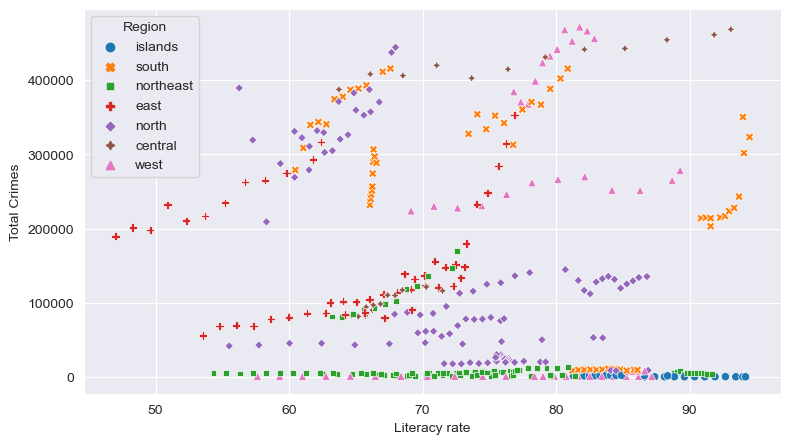

In [156]:
pt.figure(figsize=(9,5))
sb.set_style('darkgrid')
sb.scatterplot(x=df['Literacy rate'],y=df['Total Crimes'],hue=df['Region'],style=df['Region'],palette='tab10')
pt.xlabel('Literacy rate')
pt.ylabel('Total Crimes')

From above we notice that **literacy rate is highest in southern,northeast and islands region** and the **total crimes are highes in west, central and the north region**. And we can clearly see as the **literacy rate rises total crimes decline which shows indirect relation between the two** even though there are **some cases of high literacy rates accompanied with high total crimes as seen in central and southern region**.

Now we will analyse as per each state/UT

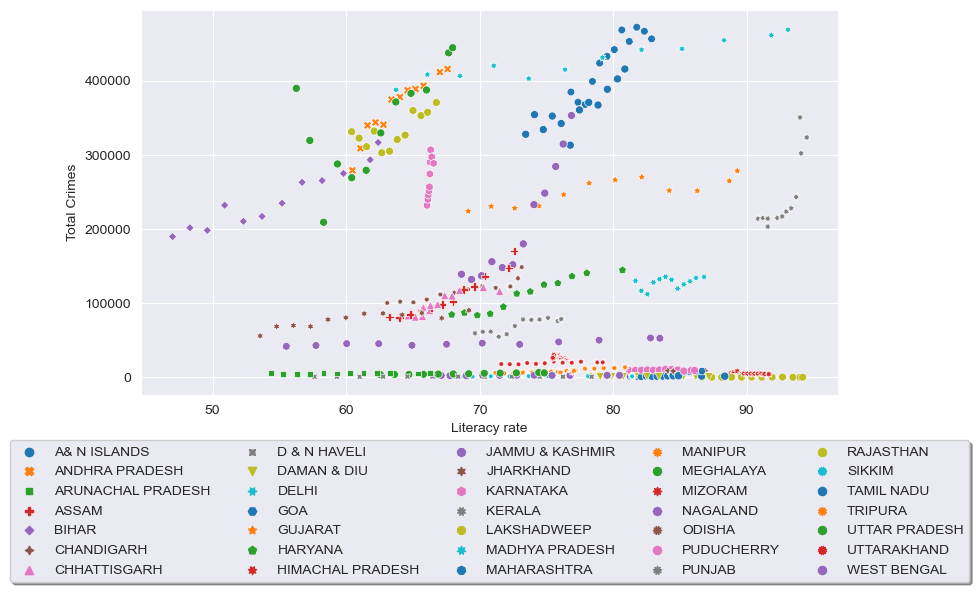

In [157]:
pt.figure(figsize=(9,5))
sb.scatterplot(x=df['Literacy rate'],y=df['Total Crimes'],hue=df['State/UT'],style=df['State/UT'],palette='tab10')
pt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

From above we see that **Lakshadweep, Mizoram, Kerela and Delhi are amongst the most literate states** as we can confirm from the region graph.But as we can see **Delhi is also one of those with the highest total crime rates tied with Maharashtra**. But if we just look at the total number of crimes, **Uttar Pradesh and Andhra Pradesh are the states with highest number**.

**So in conclusion we see that total crimes definitely decreases as the literacy rate rises with some exceptions of urban and metropolitan states like Kerela, Delhi and Maharashtra.**

# 2.2) Analysis of the type of crime vs each state vs Literacy rate.

For this we will be plotting each type of crime on y axis and literacy rate on x axis with states as hue.

## Literacy rate vs Attempt to murder vs Each State

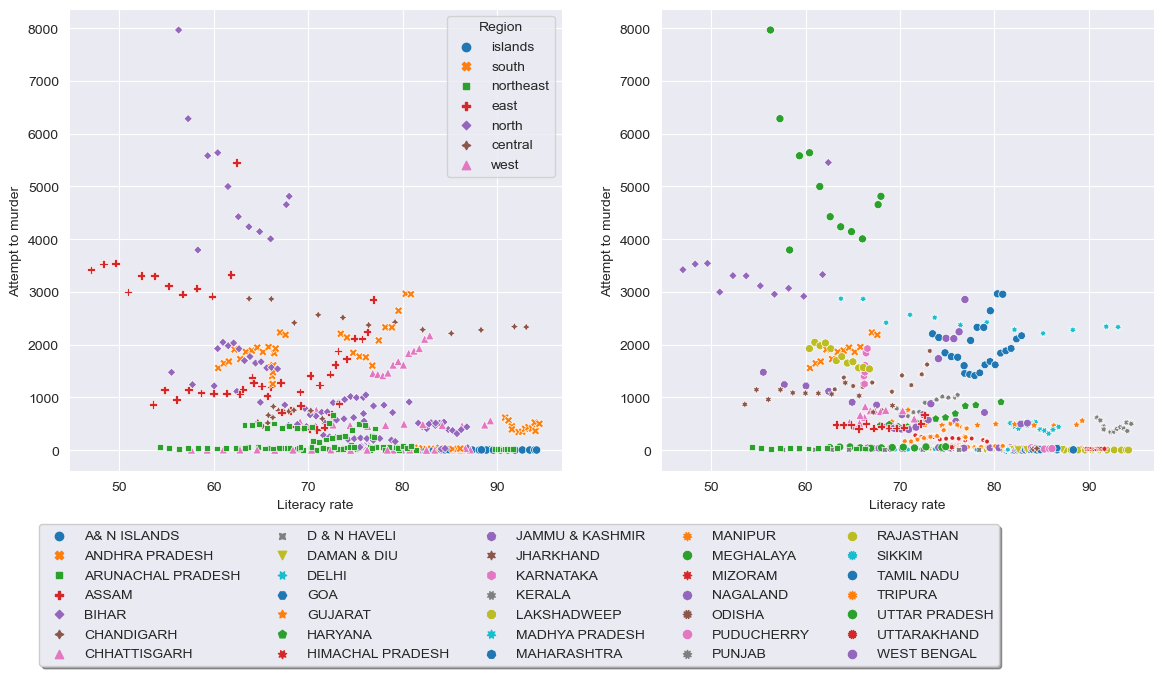

In [158]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy rate',y='Attempt to murder',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy rate',y='Attempt to murder',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

From above graphs we notice that **northern region has the highest attempts to murder with states- Uttar pradesh being the highest state with Bihar coming on second. While Lakshadweep, Arunachal Pradesh and most of the states from norteast region and some from the southern region have very low attempt to murders**.

## Literacy rate vs Murder vs Each State

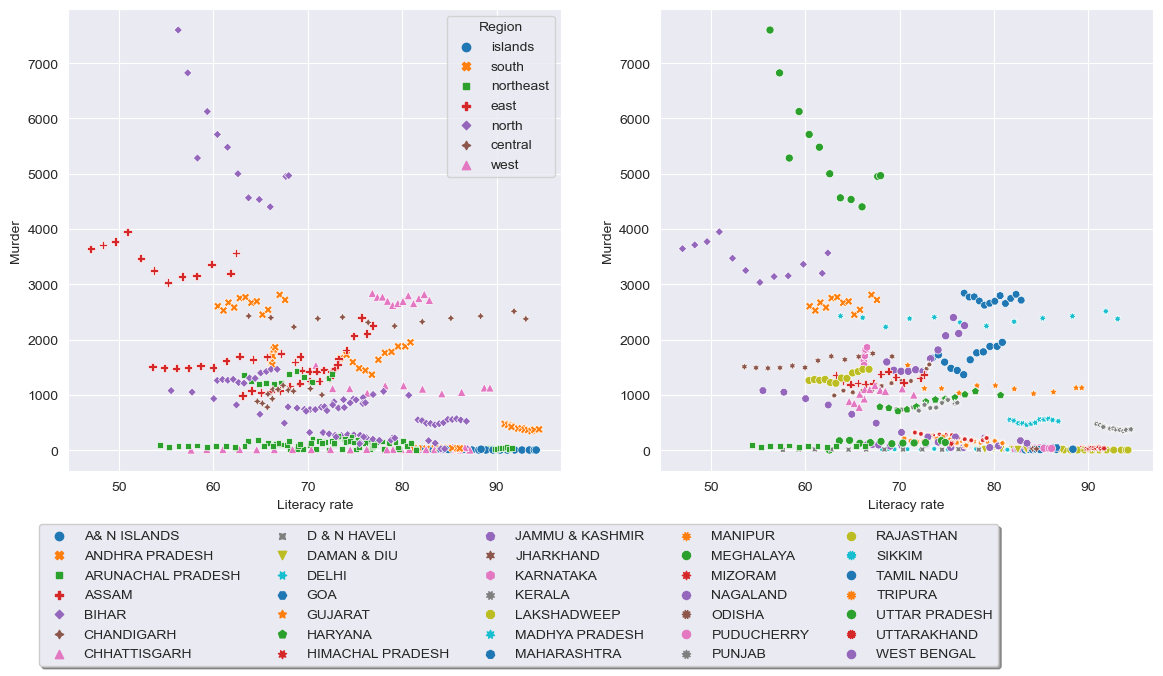

In [159]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy rate',y='Murder',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy rate',y='Murder',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

We have the same result as attempt to murder and see that **Uttar Pradesh and Bihar are the top states with murders** with literacy rates being amongst the lowest, which shows that there is a **indirect relation between murders and literacy rate.**

## Literacy rate vs Rape vs Each State

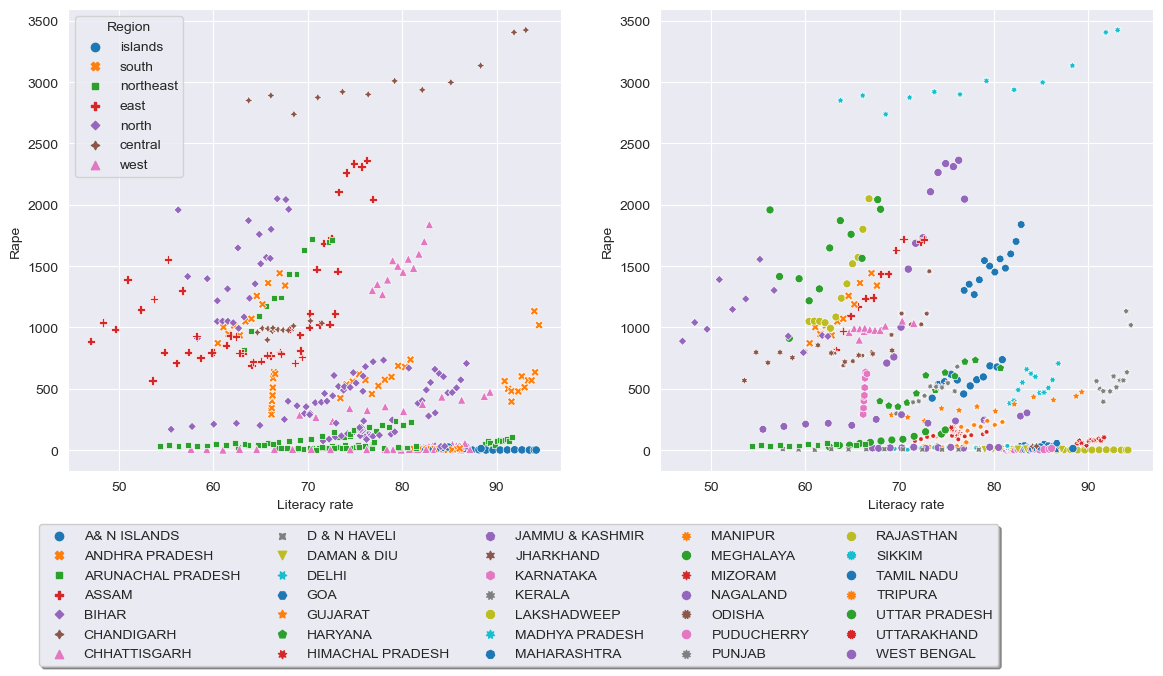

In [166]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy rate',y='Rape',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy rate',y='Rape',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

From above we can celarly see that **after 80% of literacy rate, rapes committed declines sharply which shows indirect relation** between the two **except Madhya Pradesh and Maharashtra**. **Madhya pradesh has the highest** rape cases even after having above 90% of literacy rates which makes it an exception. Apart from that we can see from the left plot that **Islands, northeast and some west and south states**

## Literacy rate vs Kidnapping and abduction vs Each State 

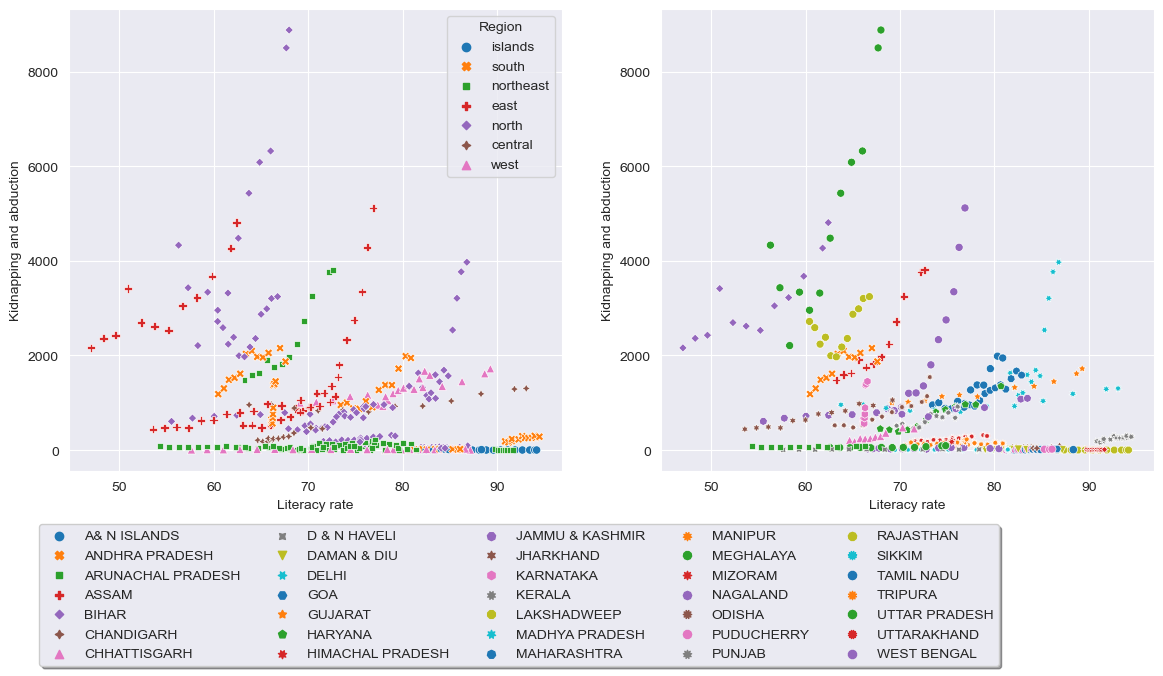

In [167]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy rate',y='Kidnapping and abduction',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy rate',y='Kidnapping and abduction',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

We can notice from above graphs that **Uttar Pradesh secures the first place again with Jammu and Kashmir and Bihar coming at second**. And again **Islands, northeast and southern states have the lowest cases and are among the highest literacy rate states**

## Literacy rate vs Dacoity vs Each State 

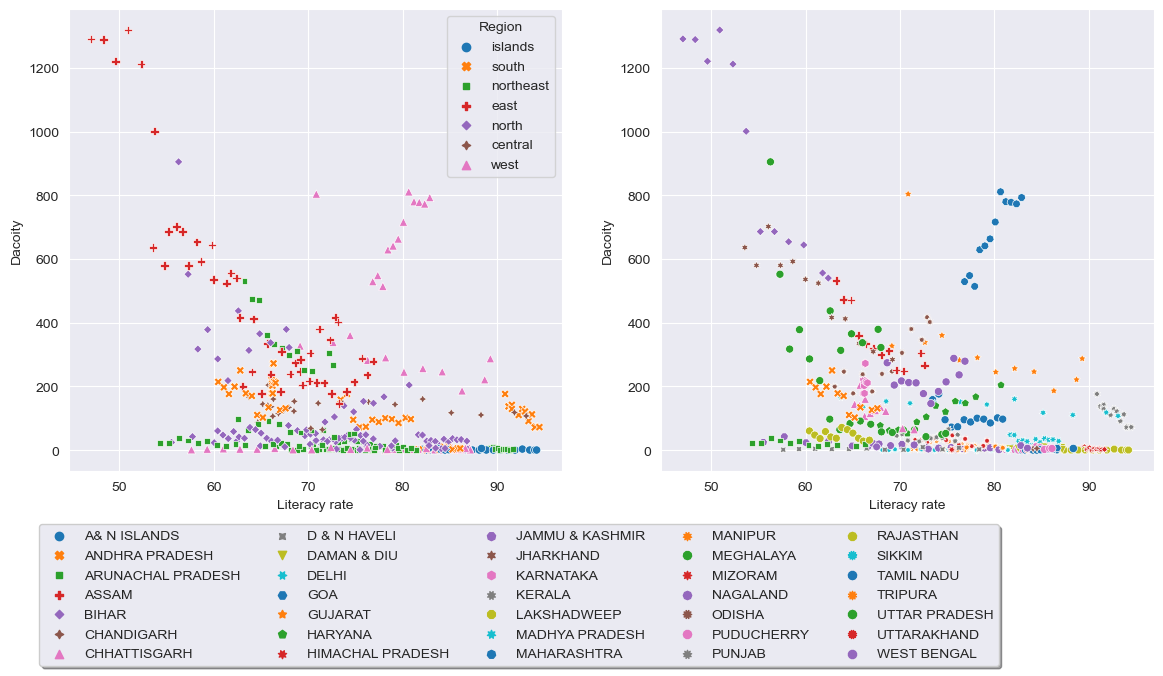

In [168]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy rate',y='Dacoity',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy rate',y='Dacoity',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

**Bihar shows the highest number of dacoity cases** accompanied with **lowest literacy rate**, which shows the **indirect relationship** again. **Maharashtra** is the only state which shows **high number of cases with more than 80% of literacy rate**. 

## Literacy rate vs Theft vs Each State  

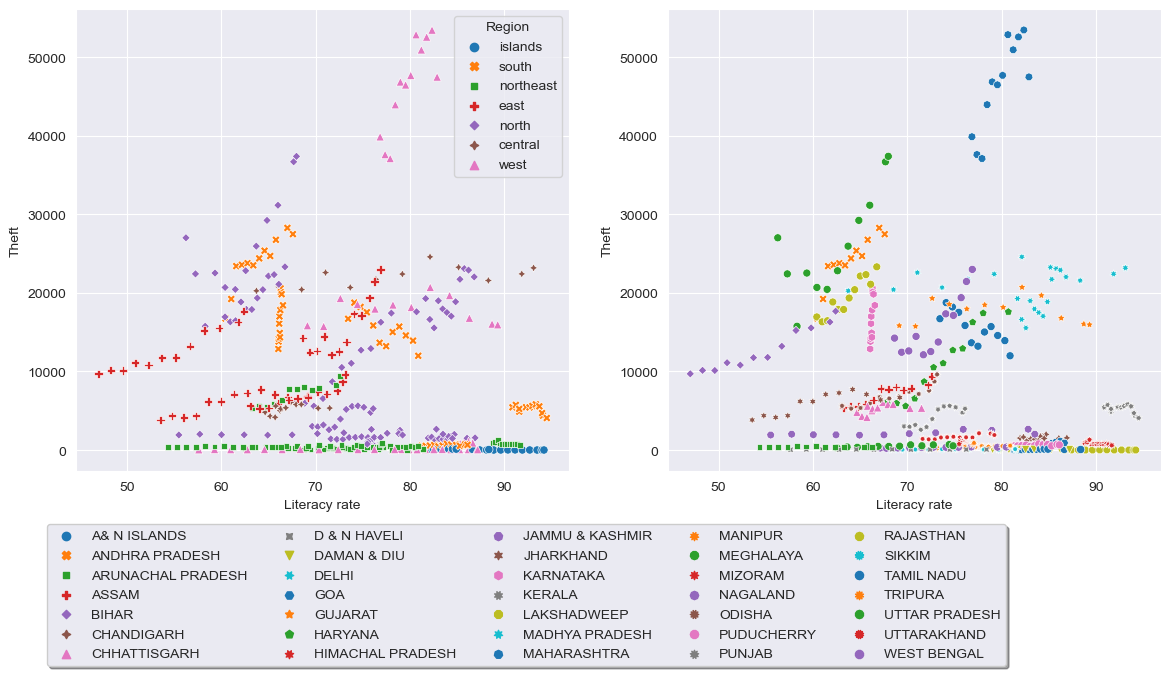

In [169]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy rate',y='Theft',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy rate',y='Theft',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

**Maharashtra comes at first with the highest number** of theft cases with high literacy rate and **Uttar Pradesh comes at second**. **Madhya Pradesh also has decent amount** of cases of theft with high literacy rate which shows that theft doesnt decreases with high literacy rate and it **prevails without considering the literacy rate**.

## Literacy rate vs Riots vs Each State   

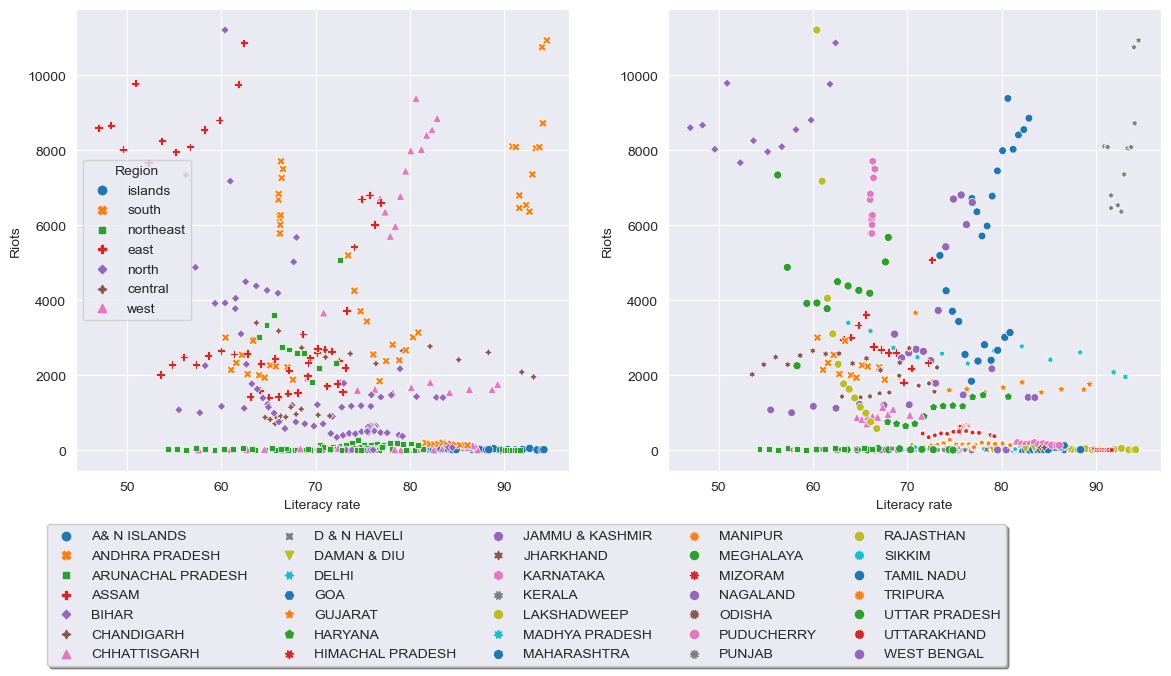

In [170]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy rate',y='Riots',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy rate',y='Riots',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

From above we see that Riots occur all over the country irrespective of the literacy rate and specially in the states like **Bihar (with low literacy rate)** and **Kerela (with high literacy rate)**. So there is **no relation between the two.**

## Literacy rate vs Cheating vs Each State   

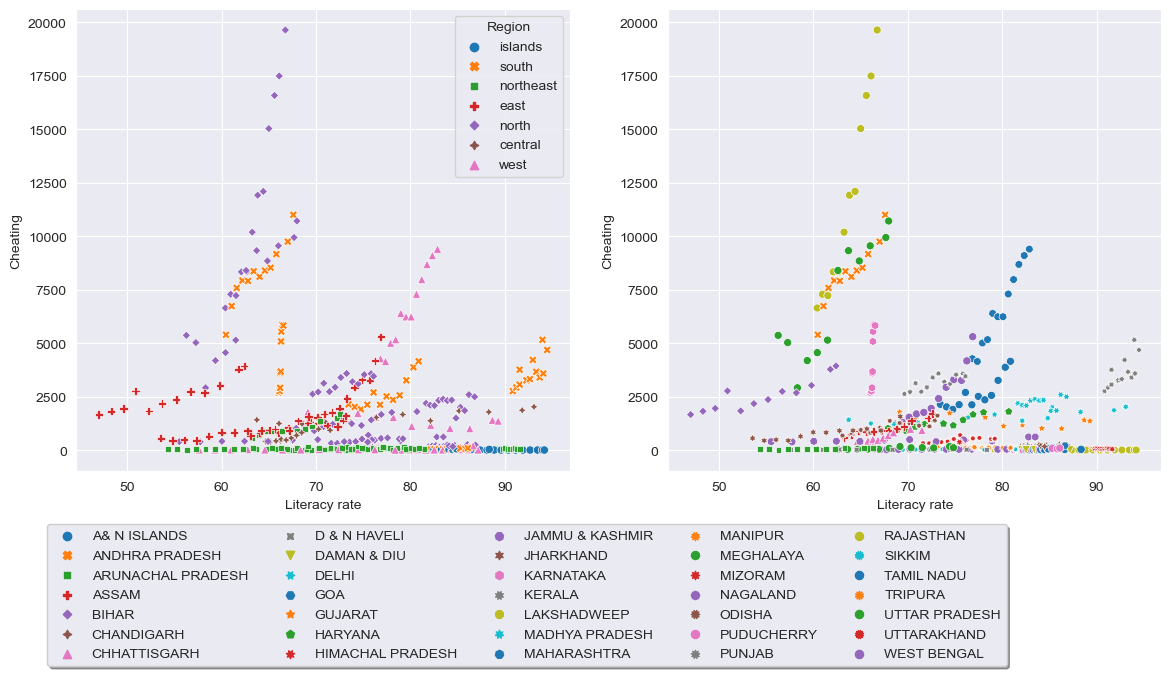

In [171]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy rate',y='Cheating',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy rate',y='Cheating',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

**Rajasthan is the state with highest number of cheating cases** and we can clearly see that apart from Maharashtra cases drop as the literacy rate rises showing **indirect relation between the two**.

## Literacy rate vs Counterfieting vs Each State    

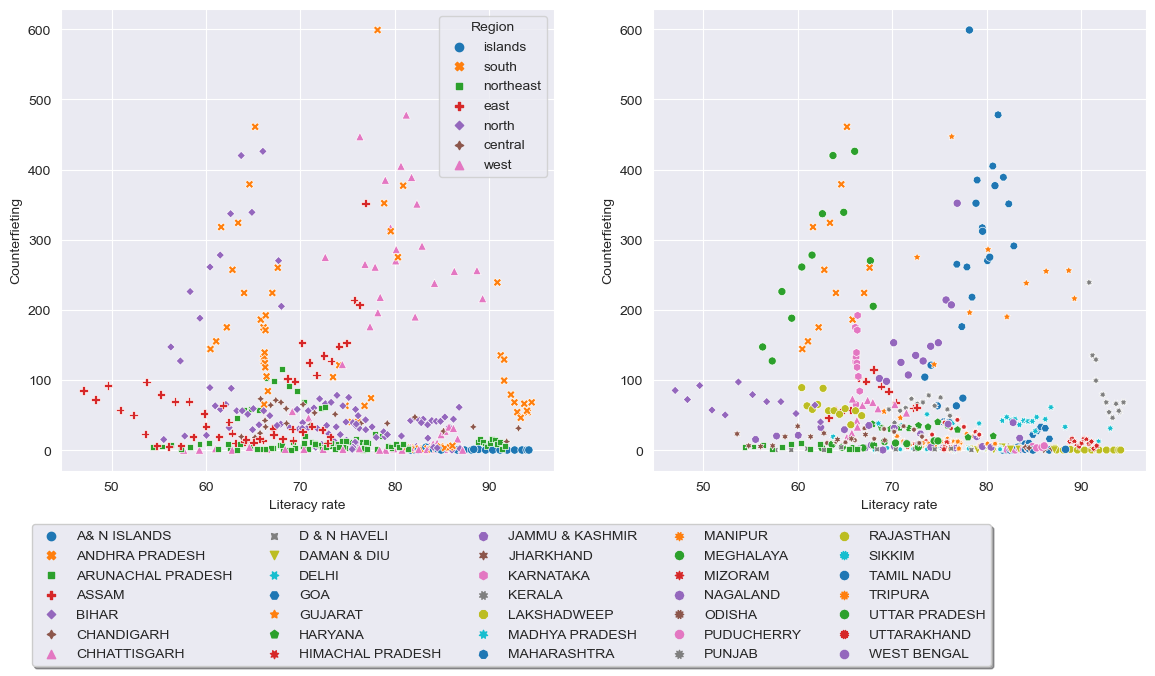

In [172]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy rate',y='Counterfieting',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy rate',y='Counterfieting',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

**Tamil Nadu secures the first place** with high literacy rate and Maharashtra comes at second jointly with Andhra Pradesh. This proves that there is no relation with literacy rate and **Southern states tops in counterfieting.**

## Literacy rate vs Dowry Deaths vs Each State     

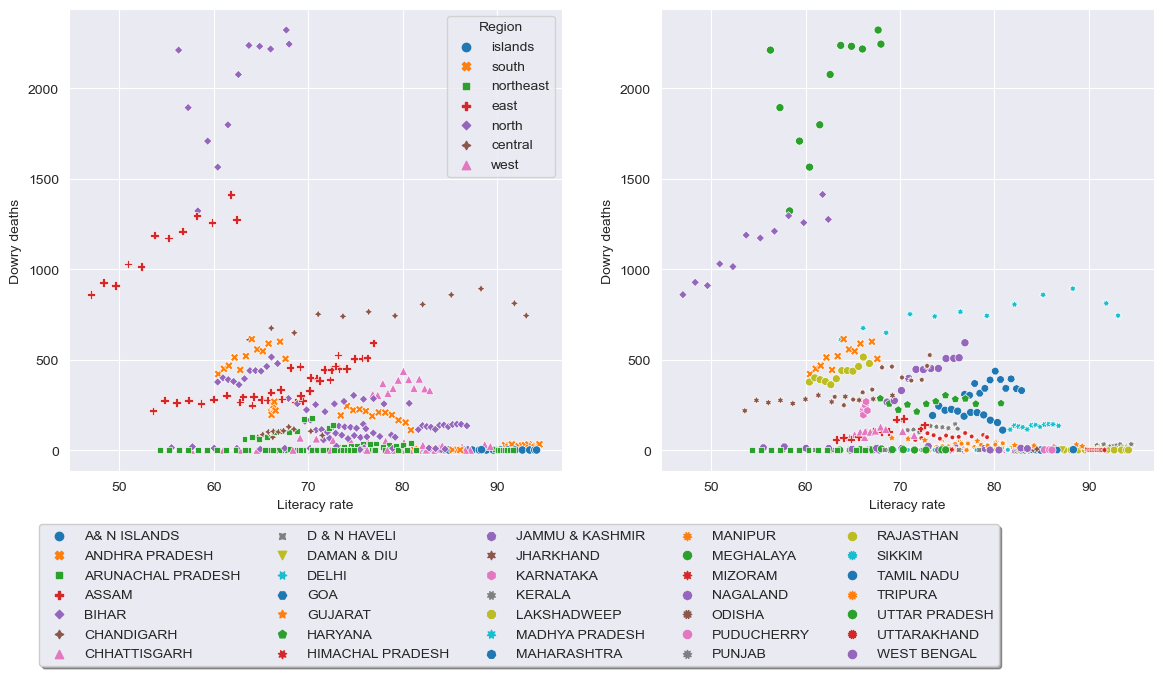

In [173]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy rate',y='Dowry deaths',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy rate',y='Dowry deaths',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

We can clearly see from above that **Bihar and Uttar Pradesh tops in this case with highest cases** and dowry deaths decreases sharply as the literacy rate rises **stating indirect relationship**.

## Literacy rate vs Hurt/Grevious Hurt vs Each State      

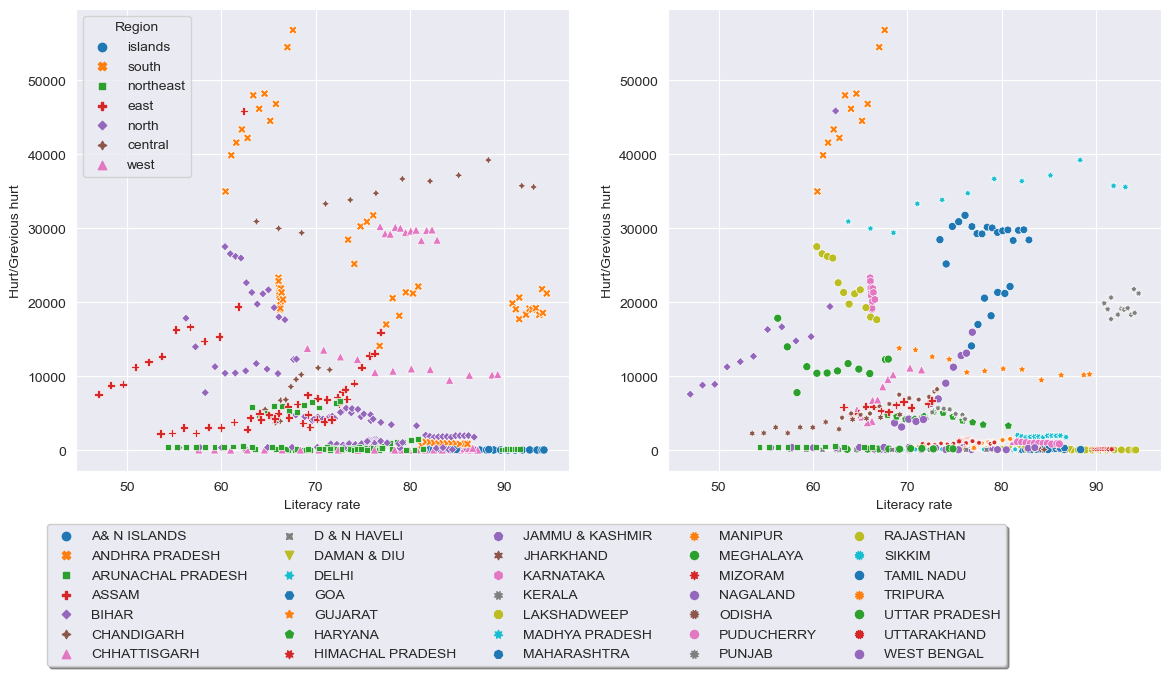

In [174]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy rate',y='Hurt/Grevious hurt',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy rate',y='Hurt/Grevious hurt',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

**Andhra Pradesh and Madhya Pradesh** tops in this category and we can see the scattered points in all directions which shows there is **no relationship** between literacy rate and hurt/grevious type of crime.

## Literacy rate vs Cruelty by husband or his relatives vs Each State       

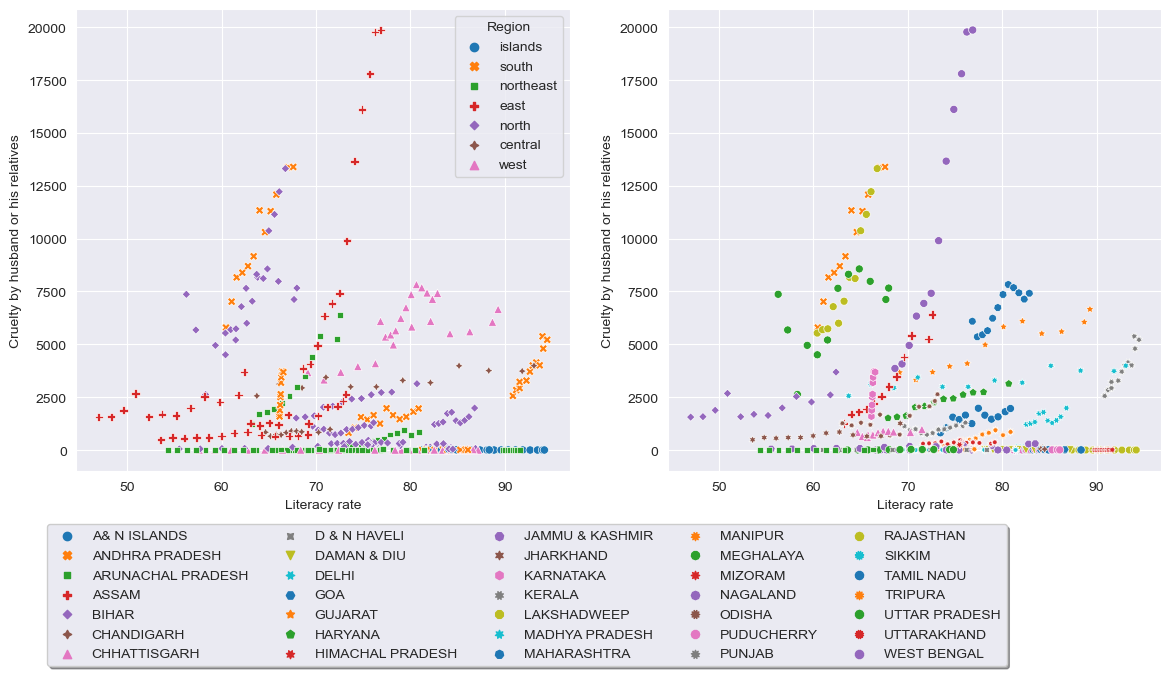

In [175]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy rate',y='Cruelty by husband or his relatives',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy rate',y='Cruelty by husband or his relatives',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

**West Bengal, Andhra Pradesh and rajasthan** are the 3 states with highest cases and even though the cases drop after some rise in literacy rate but still doesnt decrease much as Kerela( with highest literacy rate) still has more cases than some states with lower literacy rates.

## Literacy rate vs Other IPC crimes vs Each State        

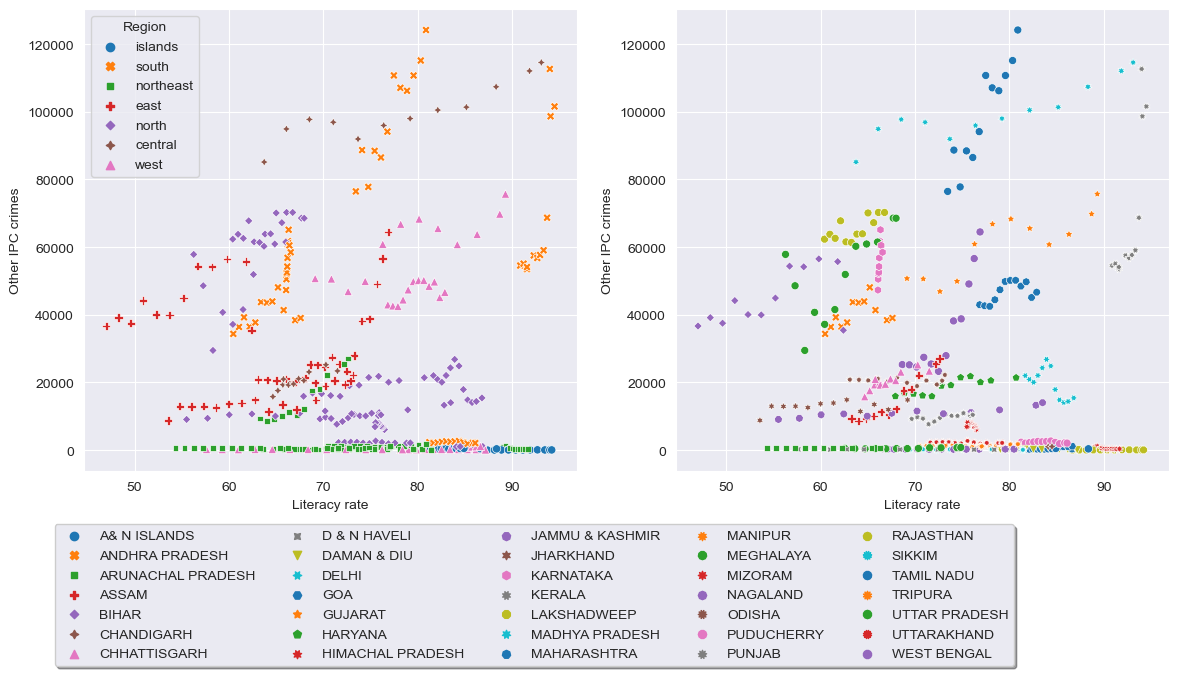

In [176]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy rate',y='Other IPC crimes',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy rate',y='Other IPC crimes',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

**Tamil Nadu, Madhya Pradesh and Kerela** are the top 3 states with most other IPC crimes and are also one of the states with higesht literacy state which shows that there is a **direct relation** between the two in this case, which can be a happen because of population, crimes reported and many other factors.

# 2.3)	Analysis of year-on-year total crime rate. 

We  will analyse each states total crime rate year on year regiona wise for better understanding and relation. It will also help by reducing the amount of codes we have to use for each state.

In [210]:
si=df.set_index("Region")
nr= si.loc[["north"]]
nr= nr.reset_index()
nr

Region          State/UT  Year  population(total)  Area (km2)  \
0    north        CHANDIGARH  2001            1054686         114   
1    north             DELHI  2001           13851503       16579   
2    north           HARYANA  2001           21083900       44212   
3    north  HIMACHAL PRADESH  2001            6077453       55673   
4    north   JAMMU & KASHMIR  2001           10070300      222236   
..     ...               ...   ...                ...         ...   
103  north   JAMMU & KASHMIR  2012           12796788      222236   
104  north            PUNJAB  2012           28045747       50362   
105  north         RAJASTHAN  2012           69835783      342239   
106  north     UTTAR PRADESH  2012          202934265      240928   
107  north       UTTARAKHAND  2012           10279517       53483   

     Literacy rate  total literate population  Attempt to murder  Murder  \
0            81.94                   643245.0                 10      15   
1            81.67                  9664764.0                510     547   
2            67.91                 12093677.0                467     781   
3            76.48                  4041621.0                 75     119   
4            55.52                  4807286.0               1474    1075   
..             ...                        ...                ...     ...   
103          83.50                  7093819.0                511     124   
104          76.11                 19216170.0               1045     855   
105          66.76                 39791828.0               1538    1461   
106          67.98                118889202.0               4811    4966   
107          79.22                  7100774.0                161     217   

     Rape  ...  Cruelty by husband or his relatives  \
0      18  ...                                   36   
1     381  ...                                  138   
2     398  ...                                 1513   
3     124  ...                                  317   
4     169  ...                                   50   
..    ...  ...                                  ...   
103   303  ...                                  301   
104   680  ...                                 1293   
105  2049  ...                                13312   
106  1963  ...                                 7661   
107   148  ...                                  368   

     Importation of girls from other countries  Other IPC crimes  \
0                                            0               914   
1                                            0             22000   
2                                            0             15906   
3                                            0              6052   
4                                            0              9046   
..                                         ...               ...   
103                                          0             14004   
104                                          0             10405   
105                                          0             70240   
106                                          0             68538   
107                                          0              2118   

     Total IPC crimes  Total Crimes  tot_crimes_sc  total crime against women  \
0                3397          8397              3                      146.0   
1               54384        130052             19                     2188.0   
2               38759         84482            283                     3372.0   
3               11499         23848             92                      880.0   
4               19505         41704              2                     1646.0   
..                ...           ...            ...                        ...   
103             24608         52634              2                     3322.0   
104             35790         78451             71                     3151.0   
105            170948        370502         653748     

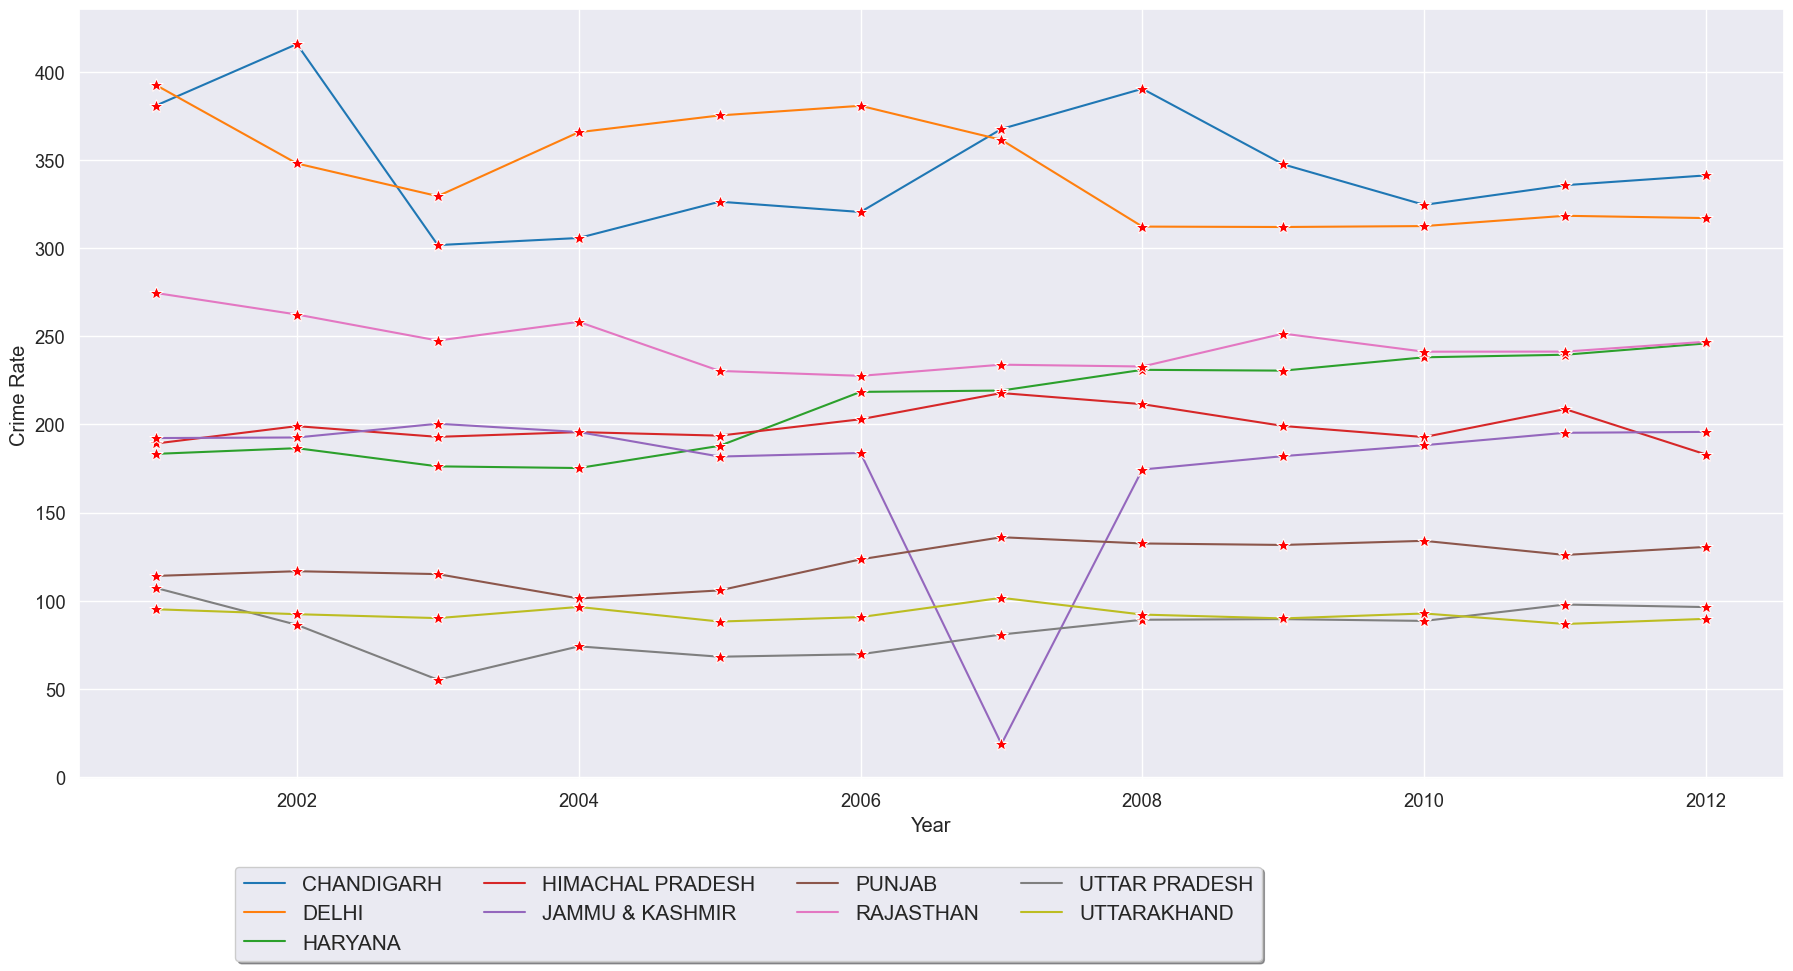

In [240]:
pt.figure(figsize=(22, 10))
sb.set(font_scale=1.2)
sb.lineplot(data=nr,x='Year',y='Crime Rate',hue='State/UT' ,marker='*',markersize=10,markerfacecolor='red',palette='tab10')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
pt.show()

From above we notice that-
- **CHANDIGARH's** crime rate were highest in 2002 and lowest in year 2003.
- The crime rates in **DELHI** peaked in 2001 and hit the lowest in the year 2008
- Crime rate of **HARYANA** was lowest in the year 2004 and highest in the year 2012.
- Highest crime rate of **HIMACHAL PRADESH** was in THE year 2007 and lowest in 2012
- Crime rate of **JAMMU & KASHMIR** was highest in 2003 and lowest in 2007. 2007 was the only year when the crime rates were less.
- **PUNJAB's** crime rate was lowest in 2004 and highest in 2007.
- Crime rate of the state **RAJASTHAN** was highest in 2001 and lowest in 2006.
- Crime Rate of **UTTAR PRADESH** was highest in 2001 and lowest in 2003.
- Crime rate of **UTTARAKHAND** peaked in the year 2007 and hit the lowest in 2011.

So in this **north region** we see that Chandigarh and Delhi are the states with the most crime rate and Uttar Pradesh and Uttarakhand with the lowest

In [236]:
si2=df.set_index("Region")
wr= si2.loc[["west"]]
wr= wr.reset_index()
wr.head()

Region      State/UT  Year  population(total)  Area (km2)  Literacy rate  \
0   west  D & N HAVELI  2001             220963         491          57.63   
1   west   DAMAN & DIU  2001             158080         112          78.18   
2   west           GOA  2001            1348900        3702          82.01   
3   west       GUJARAT  2001           50597200      196024          69.14   
4   west   MAHARASHTRA  2001          967552500      307713          76.84   

   total literate population  Attempt to murder  Murder  Rape  ...  \
0                   103904.0                  2       2     7  ...   
1                   107600.0                  2       3     6  ...   
2                   985562.0                 30      36    12  ...   
3                 29827750.0                537    1226   286  ...   
4                 63965943.0               1454    2839  1302  ...   

   Cruelty by husband or his relatives  \
0                                    4   
1                                    4   
2                                   11   
3                                 3667   
4                                 6090   

   Importation of girls from other countries  Other IPC crimes  \
0                                          0               185   
1                                          0               183   
2                                          0               697   
3                                          0             50719   
4                                          1             42963   

   Total IPC crimes  Total Crimes  tot_crimes_sc  total crime against women  \
0               360           800              0                       19.0   
1               350           755              0                        7.0   
2              2341          5279              1                       55.0   
3            103419        223956           1242                     5744.0   
4            171233        384619            625                    12255.0   

   Total crime against children  Total crimes against STs    Crime Rate  
0                           0.0                       6.0    159.038500  
1                           0.0                       0.0    224.753240  
2                          34.0                       0.0    173.707471  
3                         572.0                     309.0    204.098923  
4                        1621.0                     238.0  17675.007690  

[5 rows x 32 columns]

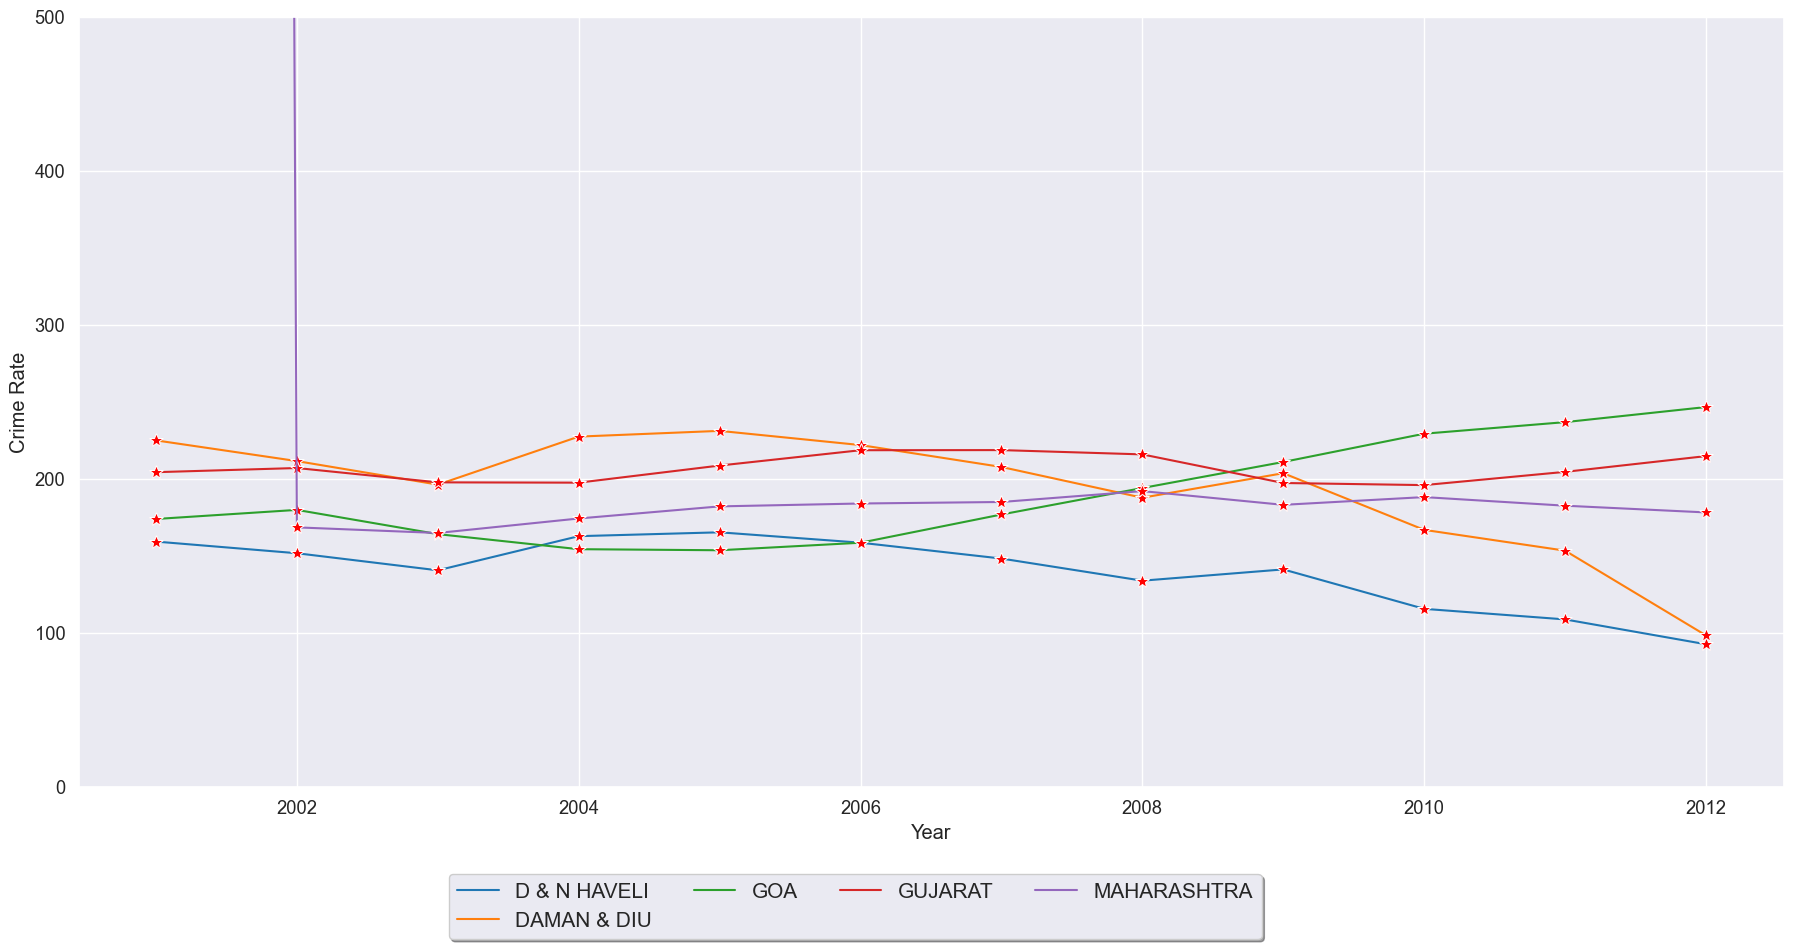

In [245]:
pt.figure(figsize=(22, 10))
sb.set(font_scale=1.2)
sb.lineplot(data=wr,x='Year',y='Crime Rate',hue='State/UT', marker='*',markersize=10,markerfacecolor='red',palette='tab10')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
pt.ylim(0, 500)
pt.show()

From above graph we notice that-
- Crime rates were highest in 2005 and lowest in 2012 in **D & N HAVELI**. The crime rates are gradually declining.
- Crime rates of **GOA** were the lowest in 2005 and highest in 2012. The crime rate are increasing continuously since 2005
- Crime rate was the highest in the year 2007 and lowest in the year 2010 in **GUJARAT**.
- Crime rate OF **MAHARASHTRA** was the highest in 2001 and has been low since then.
- Crime rate of **DAMAN & DIU** were highest in 2005 and lowest in 2012. The crime rates are decreasing since 2009.

So in **West region** apart from 2002 year (where Maharashtra had the highest crime rate as compared to every state in our country) Daman and Diu has the highest crime rate till 2006 but starts decreasing after that and Goa's crie rate has been increasing since then and has become the state with highest crime rate after 2009

In [248]:
si3=df.set_index("Region")
sr= si3.loc[["south"]]
sr= sr.reset_index()
sr.head()

Region        State/UT  Year  population(total)  Area (km2)  Literacy rate  \
0  south  ANDHRA PRADESH  2001           75728401      275045          60.47   
1  south       KARNATAKA  2001           52734986      191791          66.06   
2  south          KERALA  2001           31839000       38863          90.86   
3  south      PUDUCHERRY  2001             974820         479          81.24   
4  south      TAMIL NADU  2001           62405679      130058          73.45   

   total literate population  Attempt to murder  Murder  Rape  ...  \
0                 39934323.0               1555    2602   871  ...   
1                 30434962.0               1475    1626   293  ...   
2                 25485688.0                615     472   562  ...   
3                   696367.0                 32      25     9  ...   
4                 40524545.0               2204    1662   423  ...   

   Cruelty by husband or his relatives  \
0                                 5791   
1                                 1755   
2                                 2561   
3                                    3   
4                                  815   

   Importation of girls from other countries  Other IPC crimes  \
0                                          7             34344   
1                                          0             47301   
2                                          0             54544   
3                                          0              2324   
4                                         14             76468   

   Total IPC crimes  Total Crimes  tot_crimes_sc  total crime against women  \
0            130089        278982           2933                    13669.0   
1            109098        231916           1621                     4285.0   
2            103847        213880            499                     5270.0   
3              4068          8677              0                      111.0   
4            154801        327686              0                     6138.0   

   Total crime against children  Total crimes against STs  Crime Rate  
0                         270.0                     512.0  173.698055  
1                          68.0                     276.0  206.427322  
2                         247.0                      83.0  326.138564  
3                           5.0                       0.0  417.511251  
4                          61.0                       9.0  248.055950  

[5 rows x 32 columns]

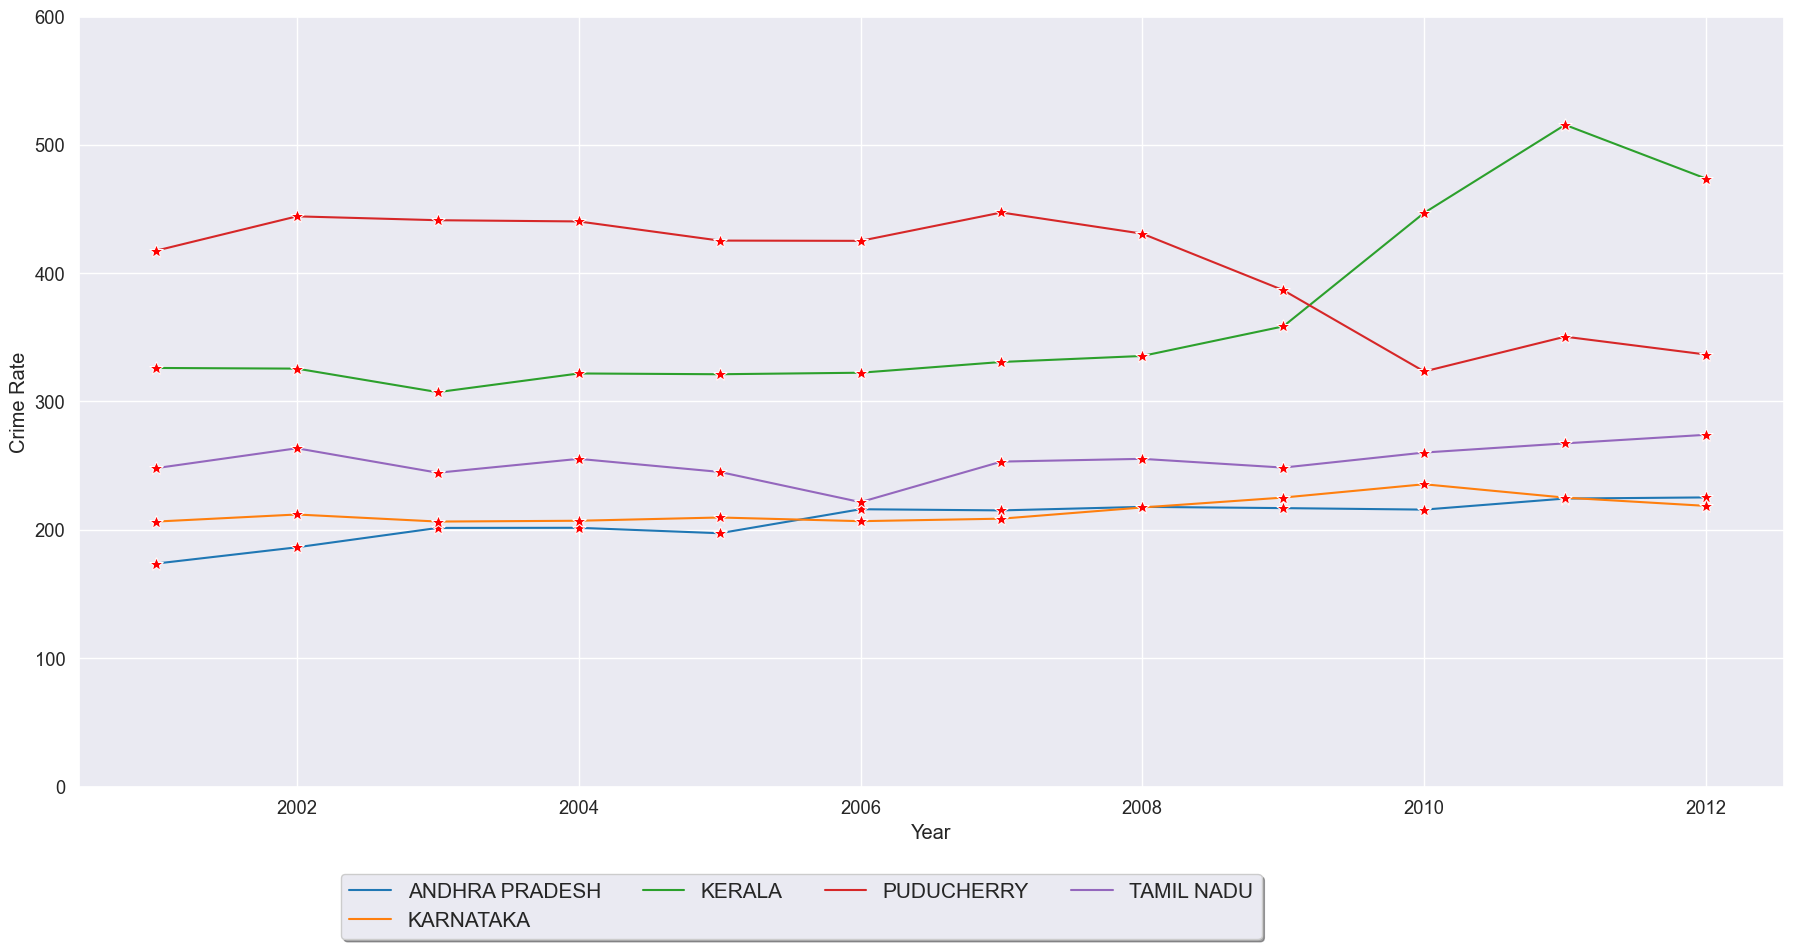

In [250]:
pt.figure(figsize=(22, 10))
sb.set(font_scale=1.2)
sb.lineplot(data=sr,x='Year',y='Crime Rate',hue='State/UT', marker='*',markersize=10,markerfacecolor='red',palette='tab10')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
pt.ylim(0, 600)
pt.show()

From above we notice that-
- **ANDHRA PRADESH's** crime rate was the lowest in 2001 and highest in 2012
- Crime rate of **Kerela** was the lowest in year 2003 and highest ion 2011
- Crime rate of **PUDUCHERRY** was highest in 2007 and lowest in 2010.
- Crime rate of **TAMIL NADU** was the lowest in 2006 and highest in 2012.
- **KARNATAKA's** crime rate was the lowest in 2003 and highest in 2010

So in the **Southern Region** Puducherry had the highest crime rate till 2009 but after that kerela took over and has been at the top since

In [7]:
si4=df.set_index("Region")
er= si4.loc[["east"]]
er= er.reset_index()
er.head()

Region     State/UT  Year  population(total)  Area (km2)  Literacy rate  \
0   east        BIHAR  2001           82879911       94163          47.00   
1   east    JHARKHAND  2001           26946070       79714          53.56   
2   east       ODISHA  2001           36707900      155707          63.08   
3   east  WEST BENGAL  2001           80221300       88752          68.64   
4   east        BIHAR  2002           84907701       94163          48.30   

   total literate population  Attempt to murder  Murder  Rape  ...  \
0                 31109577.0               3419    3643   888  ...   
1                 11777201.0                866    1507   567  ...   
2                 19837055.0               1151     987   790  ...   
3                 47196401.0                449    1594   709  ...   
4                 32771423.0               3526    3712  1040  ...   

   Cruelty by husband or his relatives  \
0                                 1558   
1                                  484   
2                                 1266   
3                                 3859   
4                                 1577   

   Importation of girls from other countries  Other IPC crimes  \
0                                         83             36667   
1                                          2              8777   
2                                          0             20810   
3                                          3             25260   
4                                         38             39145   

   Total IPC crimes  Total Crimes  tot_crimes_sc  total crime against women  \
0             88432        189612           1303                     4489.0   
1             25447         55729            158                     1851.0   
2             46661        100256             27                     4331.0   
3             61563        138955              0                     8338.0   
4             94040        201626           1579                     6847.0   

   Total crime against children  Total crimes against STs  Crime Rate  
0                          83.0                      83.0  103.458500  
1                          41.0                     282.0   94.437622  
2                          68.0                       0.0  126.780141  
3                         167.0                       2.0   76.784635  
4                          57.0                      57.0  110.755856  

[5 rows x 32 columns]

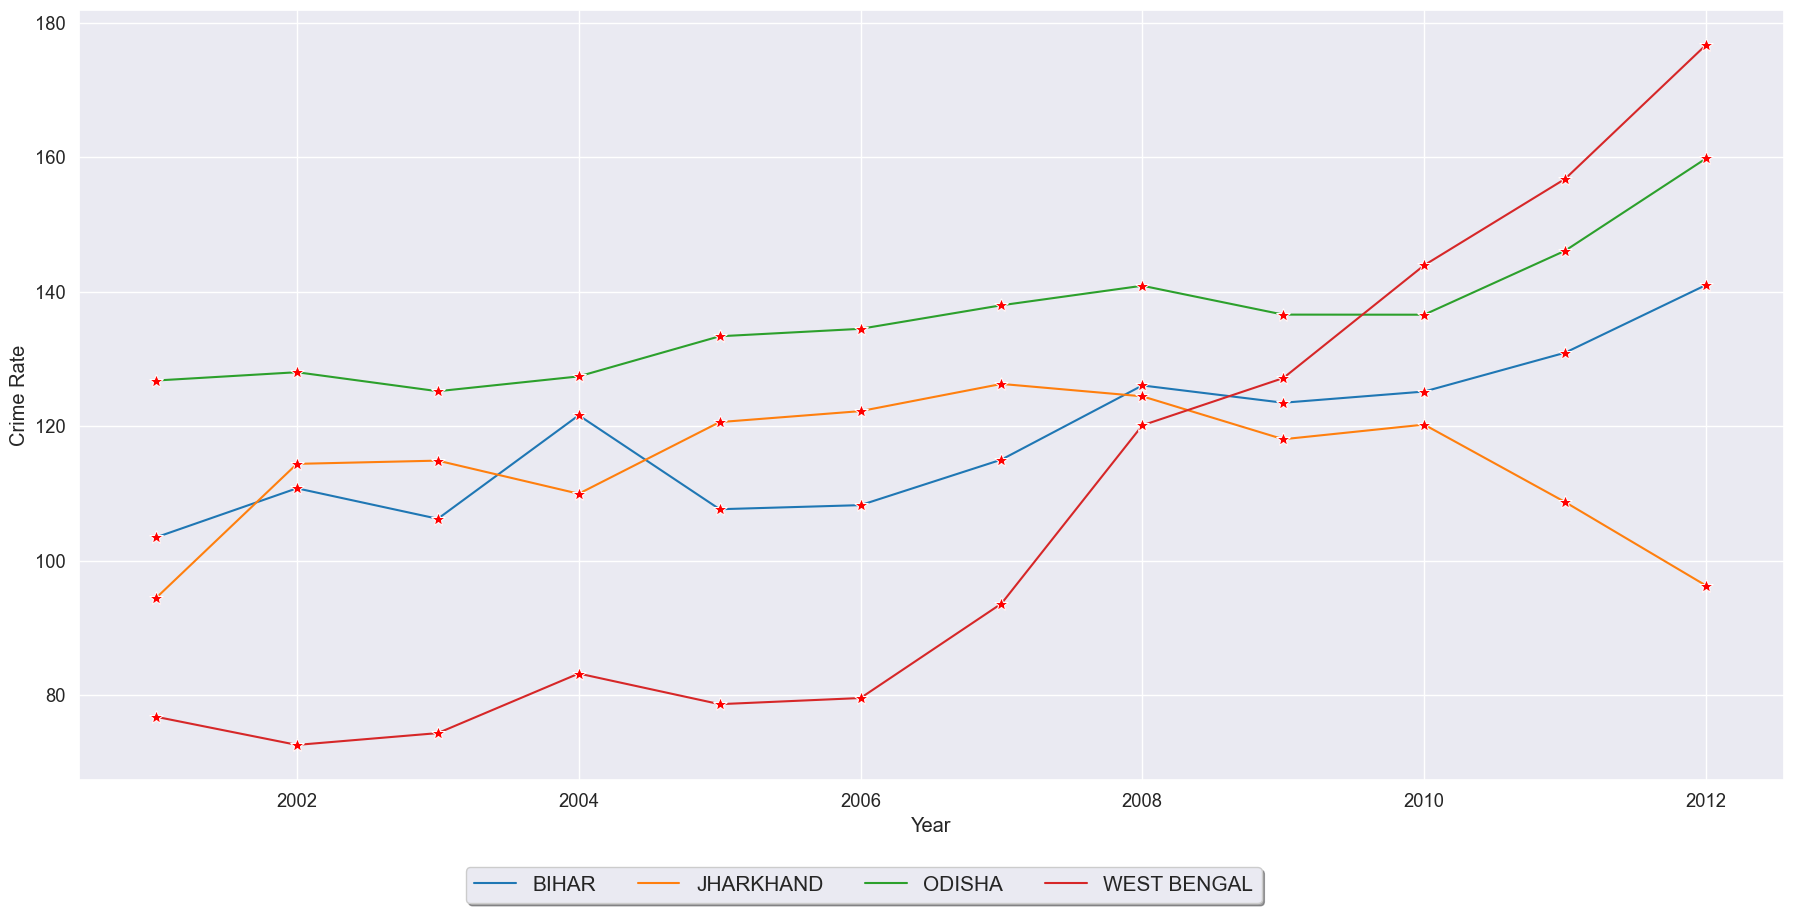

In [9]:
pt.figure(figsize=(22, 10))
sb.set(font_scale=1.2)
sb.lineplot(data=er,x='Year',y='Crime Rate',hue='State/UT', marker='*',markersize=10,markerfacecolor='red',palette='tab10')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
pt.show()

From above we get the following insights-
- Crime rate of **BIHAR** were the lowest in 2001 and highest in 2012. After hitting the high crime rate in year 2004,the crime rates desreased in the yeart 2005, but after that, the crime rates are increasing continuously.
- Crime rate of the state **JHARKHAND** was lowest in 2001 and highest in 2007.
- Crime rate of **ODISHA** was the lowest in 2003 and highest in 2012.
- Crime rate of **WEST BENGAL** is increasing continuously since 2005. It was the lowest in 2002 and highest in 2012

So in the **Eastern Region** Odisha was the state with the higesht crime rate till 2009 but West Bengal has been on top since 2010.

In [5]:
si5=df.set_index("Region")
cr= si5.loc[["central"]]
cr= cr.reset_index()
cr.head()

Region        State/UT  Year  population(total)  Area (km2)  \
0  central    CHHATTISGARH  2001           25540196      135191   
1  central  MADHYA PRADESH  2001           60385090      308245   
2  central    CHHATTISGARH  2002           22271315      135191   
3  central  MADHYA PRADESH  2002           61794635      308245   
4  central    CHHATTISGARH  2003           21718238      135191   

   Literacy rate  total literate population  Attempt to murder  Murder  Rape  \
0          64.66                 11173149.0                529     880   959   
1          63.74                 31592563.0               2870    2425  2851   
2          65.19                 11535076.0                453     844   992   
3          66.09                 32561180.0               2864    2395  2891   
4          65.72                 11909050.0                513     776   898   

   ...  Cruelty by husband or his relatives  \
0  ...                                  840   
1  ...                                 2562   
2  ...                                  653   
3  ...                                 3117   
4  ...                                  601   

   Importation of girls from other countries  Other IPC crimes  \
0                                          0             15790   
1                                          0             85143   
2                                          0             17576   
3                                          0             94923   
4                                          0             19315   

   Total IPC crimes  Total Crimes  tot_crimes_sc  total crime against women  \
0             38460         82898            501                     3964.0   
1            181741        387552           4212                    14504.0   
2             37950         81372            443                     3747.0   
3            191799        408212           7217                    15140.0   
4             38449         82143            709                      196.0   

   Total crime against children  Total crimes against STs   Crime Rate  
0                           NaN                     486.0   189.572400  
1                        1425.0                    1535.0  3009.942162  
2                         733.0                     508.0   178.409305  
3                        2329.0                    2504.0   311.895506  
4                         614.0                     774.0   177.037415  

[5 rows x 32 columns]

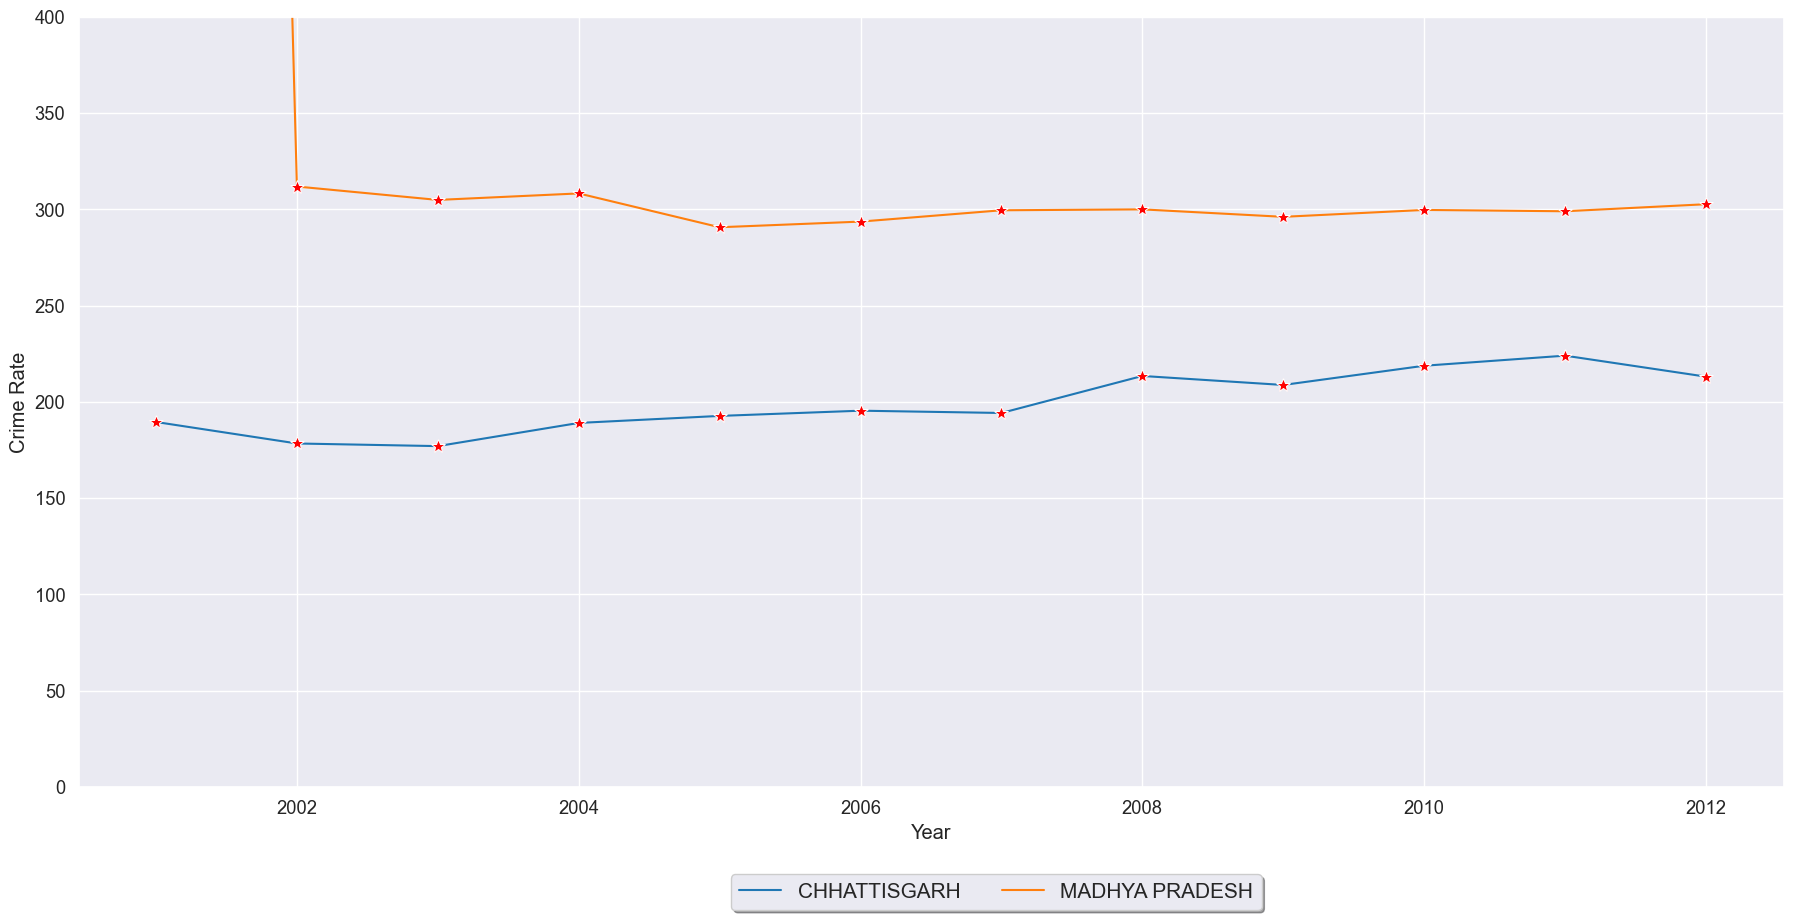

In [6]:
pt.figure(figsize=(22, 10))
sb.set(font_scale=1.2)
sb.lineplot(data=cr,x='Year',y='Crime Rate',hue='State/UT', marker='*',markersize=10,markerfacecolor='red',palette='tab10')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
pt.ylim(0,400)
pt.show()

From above we note that-
- Crime rate of **CHHATTISGARH** were lowest in 2003 and highest in the year 2011
- **MADHYA PRADESH's** crime rate was the highest (2nd highest overall as compared to other states irrepective of the year) in 2001 and has been low since then.

So in the **Central Region** Madhya pradesh has been on top always.

In [9]:
si6=df.set_index("Region")
ner= si6.loc[["northeast"]]
ner= ner.reset_index()
ner.head()

Region           State/UT  Year  population(total)  Area (km2)  \
0  northeast  ARUNACHAL PRADESH  2001            1098328       83743   
1  northeast              ASSAM  2001           26638600       78438   
2  northeast            MANIPUR  2001            2294480       22327   
3  northeast          MEGHALAYA  2001            2306540       22429   
4  northeast            MIZORAM  2001            8889690       21081   

   Literacy rate  total literate population  Attempt to murder  Murder  Rape  \
0          54.34                   484785.0                 53      83    33   
1          63.25                 14015354.0                481    1356   817   
2          70.50                  1310534.0                168     209    20   
3          62.56                  1157875.0                 47       0    26   
4          88.80                   661445.0                 15      31    52   

   ...  Cruelty by husband or his relatives  \
0  ...                                   11   
1  ...                                 1248   
2  ...                                    5   
3  ...                                    4   
4  ...                                   16   

   Importation of girls from other countries  Other IPC crimes  \
0                                          0               618   
1                                          0              9315   
2                                          0              1097   
3                                          0               511   
4                                          3               499   

   Total IPC crimes  Total Crimes  tot_crimes_sc  total crime against women  \
0              2342          5243              0                      180.0   
1             36877         81418              6                     4048.0   
2              2489          5309              0                      108.0   
3              1687          3562              0                       66.0   
4              2246          5424              1                      124.0   

   Total crime against children  Total crimes against STs  Crime Rate  
0                           0.0                      72.0  217.834500  
1                          18.0                       0.0  140.759800  
2                           0.0                       0.0  114.870490  
3                           0.0                       0.0   72.752458  
4                           0.0                      10.0  252.764826  

[5 rows x 32 columns]

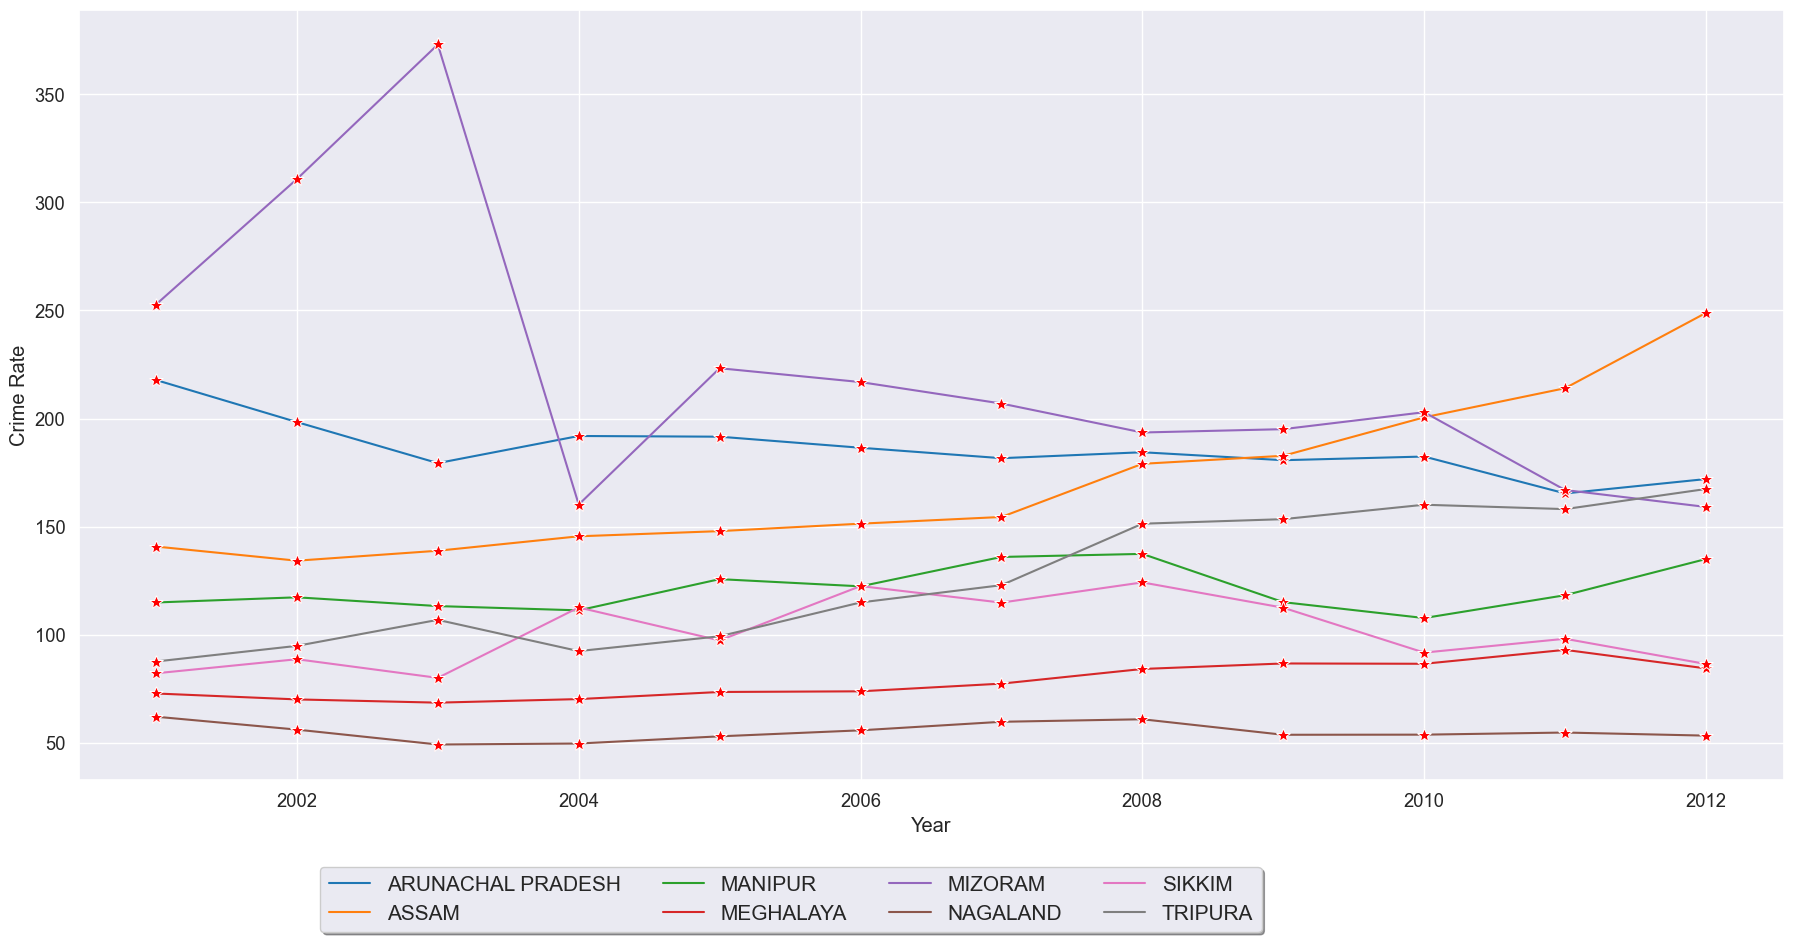

In [11]:
pt.figure(figsize=(22, 10))
sb.set(font_scale=1.2)
sb.lineplot(data=ner,x='Year',y='Crime Rate',hue='State/UT', marker='*',markersize=10,markerfacecolor='red',palette='tab10')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
pt.show()

From the above graph we notice the following-
- Crime rate of **ARUNACHAL PRADESH** were highest in year 2001 and lowest in year 2011
- Crime rate of **MANIPUR** was highest in year 2008 and lowest in 2010.
- **MIZORAM's** crime rate was the highest in 2003 and lowest in 2004.
- Crime rate of **SIKKIM** was lowest in 2003 and highest in 2008.
- Crime rates of **ASSAM** were the lowest in 2002 and highest in yeasr 2012
- Crime rate of **MEGHALAYA** was lowest in 2003 and highest in 2011.
- Crime rate of **NAGALAND** was lowest in 2003 and highest in 2008.
- **TRIPURA's** crime rate was lowest in 2001 and highest in 2012.

So in the **Norteastern Region** Mizoram was on top till 2010 except for the year 2004 where Arunachal Pradesh had the highest crime rate but since 2011 Assam has been on top

# 2.4)	 Analysis of area vs overall crime

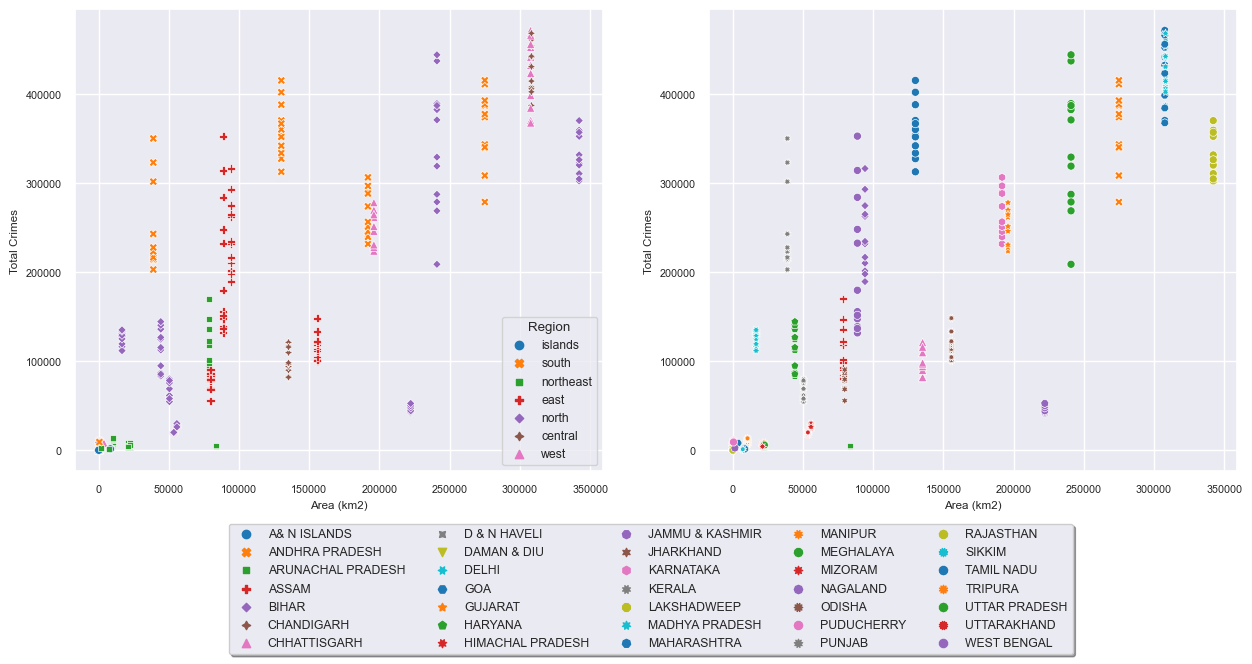

In [20]:
fig,axes = pt.subplots(1,2, figsize=(15,6))
sb.set(font_scale=0.8)
sb.scatterplot(ax=axes[0],x='Area (km2)',y='Total Crimes',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Area (km2)',y='Total Crimes',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

According to the graph we see that **Rajasthan** is the **largest** state in terms of area and Mahrasthra comes at 2nd and Uttar Pradesh at 3rd while the smallest in terms of area are mostly Islands and Union Territories.

The graph shows the relationship between the AREA of the state and TOTAL CRIMES. The different colours represents different states. There is a **positive correlation** between the TOTAL CRIMES and the AREA of the state. As the AREA of the state increases, the TOTAL CRIMES also increases.

- States/UT with small AREAS have less TOTAL CRIMES.
- States/UT with large AREAS have more TOTAL CRIMES.

# 2.5)	 Analysis of Population vs overall Crime 

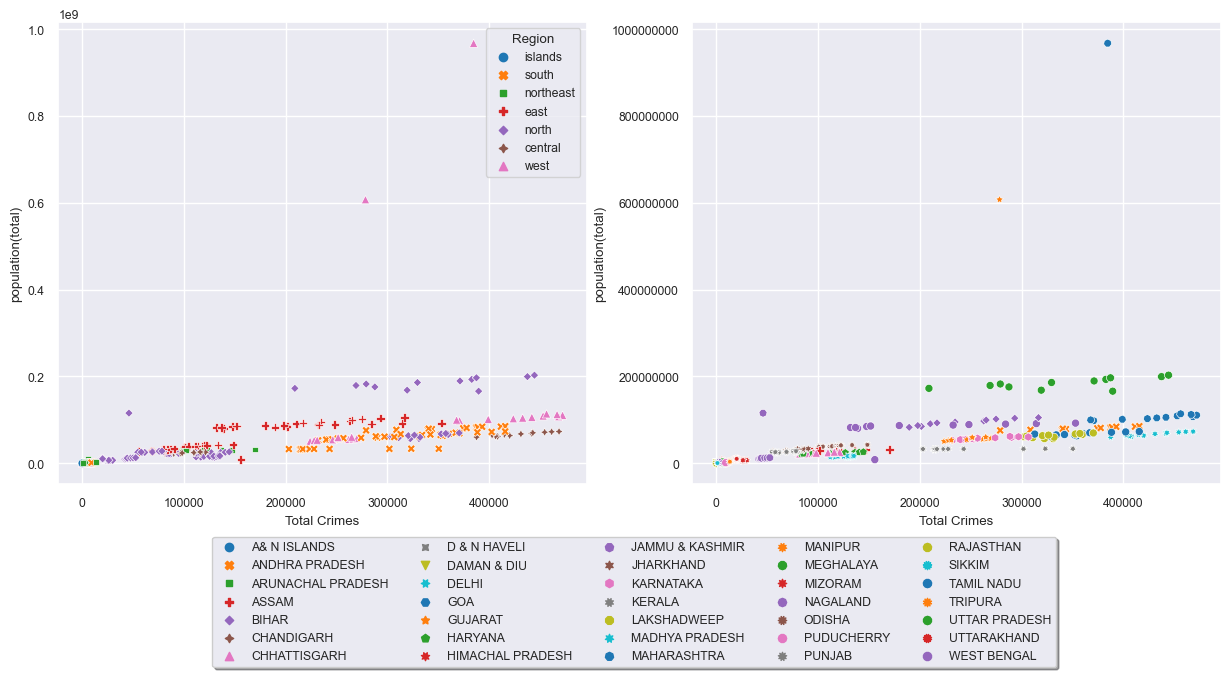

In [26]:
fig,axes = pt.subplots(1,2, figsize=(15,6))
sb.set(font_scale=0.8)
pt.ticklabel_format(style='plain', axis='y')
sb.scatterplot(ax=axes[0],y='population(total)',x='Total Crimes',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],y='population(total)',x='Total Crimes',data=df,hue='State/UT',palette='tab10',style='State/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

From the above 2 graphs, we can observe that as the Population increases, the overall crimes also increases, so there is a **Direct Relaitionship**.

In second graph, X-axis shows the total crimes and y-axis represents the total population, while the different colours of the dots shows different states/UT. Maharashtra and Gujarat secures 1st and 2nd place respectively and Uttar Pradesh comes at 3rd in terms of poulation

# 2.6)	Each state crime report. 

We will make 3 graphs for analysing Total crimes, Total Ipc crimes and the overall crime rate for making the report

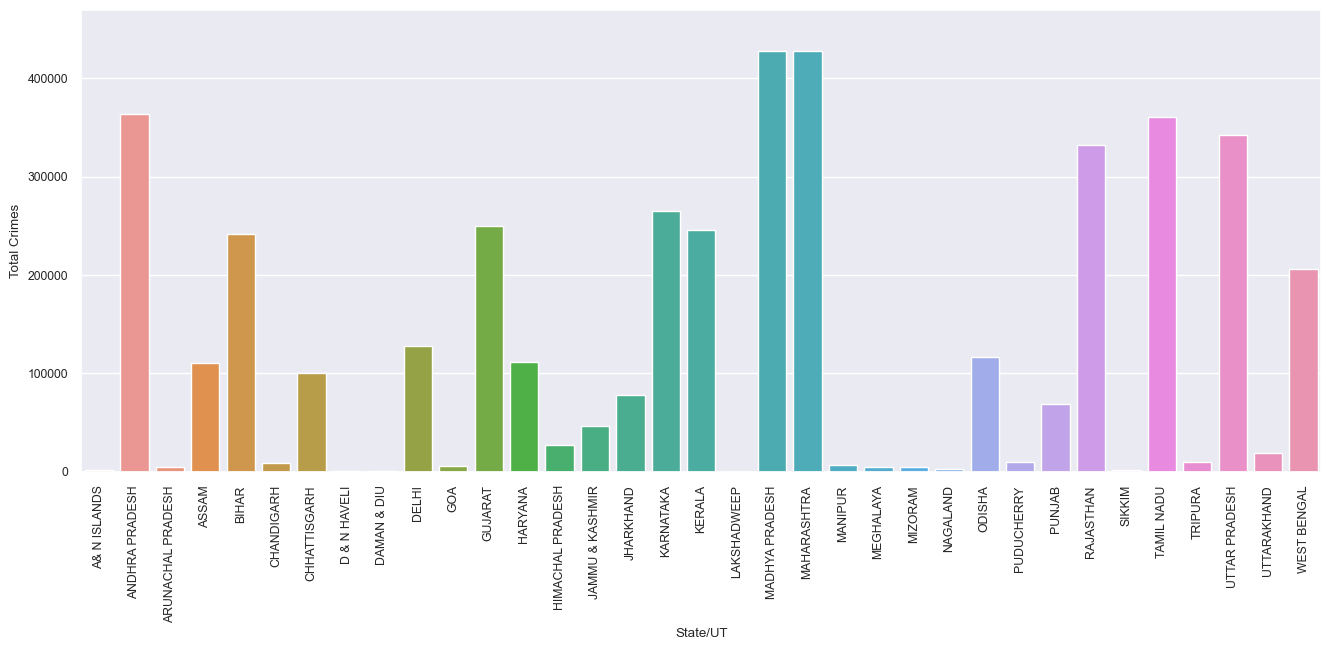

In [32]:
pt.figure(figsize=(16,6))
sb.barplot(x='State/UT', y='Total Crimes',data=df,errwidth=0)
pt.xticks(rotation=90)
pt.show()

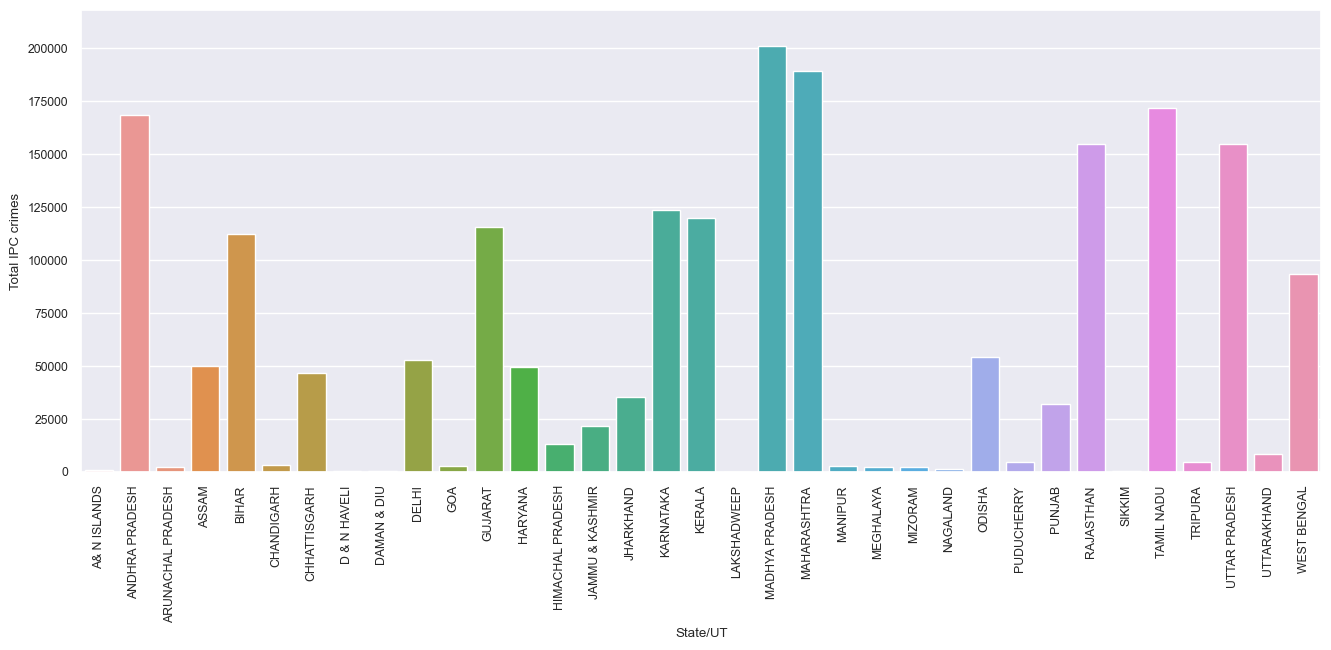

In [36]:
pt.figure(figsize=(16,6))
sb.barplot(x='State/UT', y='Total IPC crimes',data=df,errwidth=0)
pt.xticks(rotation=90)
pt.show()

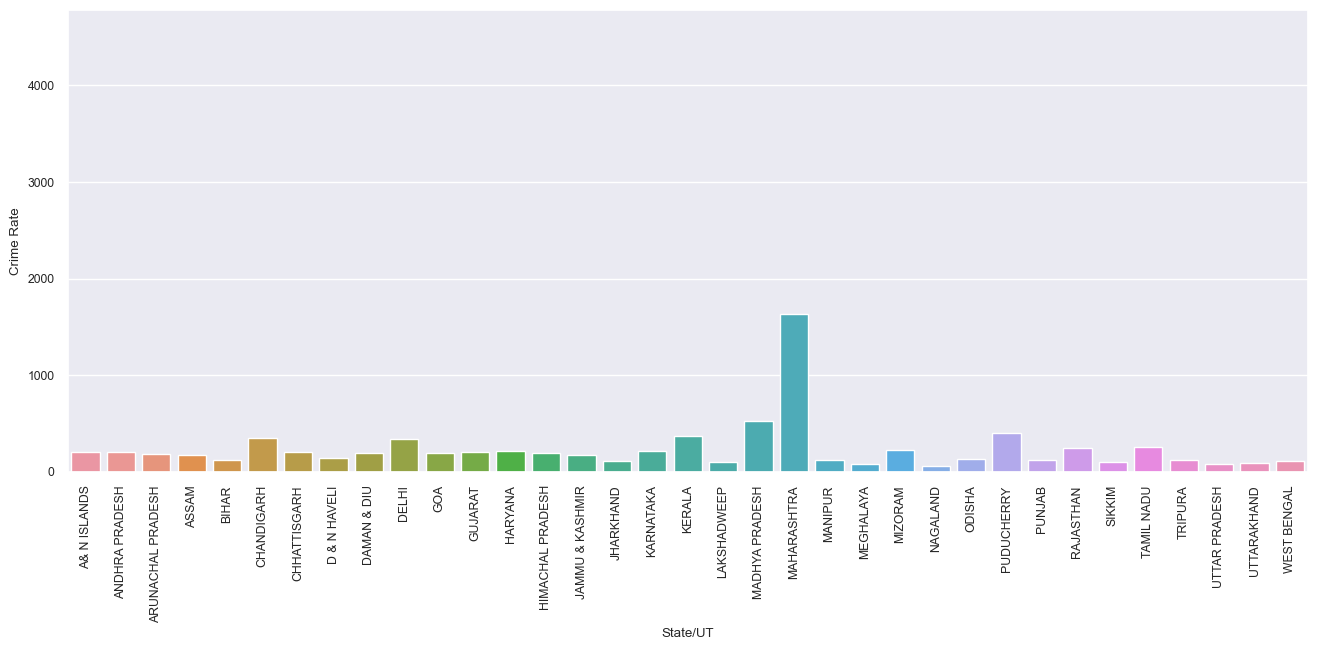

In [38]:
pt.figure(figsize=(16,6))
sb.barplot(x='State/UT', y='Crime Rate',data=df,errwidth=0)
pt.xticks(rotation=90)
pt.show()

- A& N ISLANDS- Andaman & Nicobar Island has very low Total crimes and Total IPC crimes.Crime rate were the lowest in the year 2002 and highest in 2012.But overal the crime rate is low.

- ANDHRA PRADESH- Total crimes are high and Total Ipc crimes are also high. crime rate was the lowest in 2001 and highest in 2012. Its also one of the **top states in crimes like Creulty by husband and hurt/grevious hurt**.

- ARUNACHAL PRADESH- Total crimes and Total Ipc crimes both are low. Crime rate of ARUNACHAL PRADESH were highest in year 2001 and lowest in year 2011. 

- ASSAM- Crime rates of ASSAM were the lowest in 2002 and highest in yeasr 2012. The Crime rate is increasing continuously.

- BIHAR- The Total Crimes and Total IPC crimes of BIHAR are moderate. The crime rate is also moderate, it was the lowest in 2001 and highest in 2012. After hitting the high crime rate in year 2004,the crime rates desreased in the yeart 2005, but after that, the crime rates are increasing continuously.Its also one of the **top states in crimes like Dacoity, Riots, Dowry Deaths, Kidnapping and Murders.**

- CHANDIGARH- The total crimes and Total IPC crimes of CHANDIGARH is low. CHANDIGARH'S crime rate hit the highest in 2002 and lowest in year 2003.

- CHHATTISGARH-With low total crimes and low Total IPC crimes, It has low crime rate which was lowest in 2003 and highest in the year 2011.

- D & N HAVELI- Being a UT with an area of 491 km2, It has very low total crimes and very low total IPC crimes.

- DAMAN & DIU- Its also an UT near Gujrat, crime rate of DAMAN & DIU were highest in 2005 and lowest in 2012. The crime rates are decreasing since 2009.

- DELHI – The Capital of India , Delhi has low total IPC crimes, the The peak of crime rates in DELHI were in 2001 and hit the lowest in the year 2008. 

- GOA- Goa has low crime rate. Crime rates were the lowest in 2005 and highest in 2012. The crime rate were increasing continuously since 2005.

- GUJARAT – Total IPC crimes and Total crimes are high. Crime rate was the highest in the year 2007 and lowest in the year 2010.

- HARYANA – It has less Total IPC crimes and Total crimes compared to Gujrat. But it's crime rate is increasing continuously.

- HIMACHAL PRADESH – Highest crime rate of HIMACHAL PRADESH was in year 2007 and lowest in 2012. The crime rate is decreasing.

- JAMMU & KASHMIR – The crime rate is low of JAMMU & KASHMIR, but one of the states with highest cases of **Kidnapping.**

- JHARKHAND – Crime rate of the state JHARKHAND was lowest in 2001 and highest in 2007, the crime rate is declining since 2007.

- KARNATAKA -Karnataka has high Total IPC crime and Total crimes.

- KERALA – Crime rate was the lowest in year 2003 and highest ion 2011 and are decreasing after 2011. it is the no.1 literacy state of india. Was on of the states with **highest cases of other IPC crimes** also one of the highest cases of **Riots**

- LAKSHADWEEP – It has the **lowest crimes.** It is a small state whose crime rate was lowest in 2003 and highest in 2009. Its the State/UT with the lowest area.

- MADHYA PRADESH – It has the **highest total IPC crimes and total crimes**. MADHYA PRADESH's crime rate was the highest in 2001 and has been low since then. Was on of the states with **highest cases of other IPC crimes** and one of the top states in cases like **Hurt/Grevious hurt and Rapes.**

- MAHARASHTRA – It has the **2nd highest Total IPC crimes and total crimes**. Also, it has the **highest crime rate.** Its the state with **most cases of Rape and Theft.**

- MANIPUR- It is a state with very low total crimes. The crime rate of MANIPUR are sometimes high, sometimes low. Crime rate was highest in year 2008 and lowest in 2010. It is less populated.

- MEGHALAYA – MEGHALAYA's total crimes are also very low with one of the lowest crime rates. me rate of MEGHALAYA was lowest in 2003 and highest in 2011 and is decreasing since then.

- MIZORAM – It also has a less crime rate. MIZORAM's crime rate was the highest in 2003 and lowest in 2004.

- NAGALAND – The north-eastern state with the **lowest crime rate**.Crime rate of NAGALAND was lowest in 2003 and highest in 2008 and after 2008, the crime rate is gradually decreasing.

- ODISHA – The total IPC crimes and Total crimes are low, 647946 crimes were happened in the duration of 11 years. Crime rate of ODISHA was the lowest in 2003 and highest in 2012. 

- PUDUCHERRY- PUDUCHERRy also has a very low crime rate. Crime rate of PUDUCHERRY was highest in 2007 and lowest in 2010.

- PUNJAB - The total crimes are low of this state. PUNJAB's crime rate was lowest in 2004 and highest in 2007.

- RAJASTHAN- It has high Total IPC crimes and total crimes.Crime rate of the state RAJASTHAN was highest in 2001 and lowest in 2006. it is the **largest state of India** in terms of area. Also one of the states with **high number of cases of cruelty by husband and cheating**

- SIKKIM- SIKKIM has one of the lowest Total crimes and total IPC crimes. The crime rate is also very low. Crime rate of SIKKIM was lowest in 2003 and highest in 2008.

- TAMIL NADU – Tamil nadu has very high total crimes. Crime rate of TAMIL NADU was the lowest in 2006 and highest in 2012. Was on of the states with **highest cases of other IPC crimes** and the state with highest cases of **Counterfieting.**

- TRIPURA – IT has one of the lowest crime rates in India.

- UTTAR PRADESH- With high total IPC crimes and Total crimes, it is the **most populated state** of India. Crime rate is low,Crime Rate of UTTAR PRADESH was highest in 2001 and lowest in 2003, and the state with high number of cases of **DOwry death, kidnapping, theft and murders**

- UTTARAKHAND – Very low total IPC crimes and total crimes. the crime rate is also very low which peaked in the year 2007 and hit the lowest in 2011.

- WEST BENGAL- It has moderate total crimes and total IPC crimes. Crime rate of WEST BENGAL is increasing continuously since 2005. It was the lowest in 2002 and highest in 2012. Its also **one of the states with highest number of rape cases reported**